# Imports

In [16]:
import matplotlib.pyplot as plt
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import pandas as pd
import numpy as np 
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches

pd.set_option('display.max_columns', None)

# Pre-processing the data

In [152]:
# Put that csv file path here
df = pd.read_csv(r"D:\FData\Scoresway_viz\MohunBagan_vs_MumbaiCityFC.csv",encoding='utf-8')

# Put the Opta events and qualifiers excel file path here
Events = pd.read_excel(r"D:\FData\Opta\Opta Events.xlsx")
qualifiers = pd.read_excel(r"D:\FData\Opta\Opta Qualifiers.xlsx")

df = df.iloc[:,:78]

for i in range(len(df)):
    for x in range(len(Events)):
        if df["typeId"][i]== Events["Code"][x]:
            df["typeId"][i]= Events["Event"][x]

columns = ['qualifier/0/qualifierId','qualifier/1/qualifierId','qualifier/2/qualifierId','qualifier/3/qualifierId','qualifier/4/qualifierId',
            'qualifier/5/qualifierId','qualifier/6/qualifierId','qualifier/7/qualifierId','qualifier/8/qualifierId','qualifier/9/qualifierId',
            'qualifier/10/qualifierId','qualifier/11/qualifierId','qualifier/12/qualifierId','qualifier/13/qualifierId','qualifier/14/qualifierId',
            'qualifier/15/qualifierId']
#,'qualifier/18/qualifierId'
for i in range(len(df)):
        for x in range(len(qualifiers)):
                for column in columns:
                        if df[column][i]== qualifiers["Code"][x]:
                                df[column][i]= qualifiers["Qualifier"][x]

df['outcome'] = df['outcome'].replace([0,1], ['Unsuccessful', 'Successful'])

df.rename(columns={'contestantId':'team_name'}, inplace=True)

C:\Users\h\AppData\Local\Temp\ipykernel_16100\3731241654.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["typeId"][i]= Events["Event"][x]
C:\Users\h\AppData\Local\Temp\ipykernel_16100\3731241654.py:13: FutureWarning: Setting an item 

In [153]:
n=df[['playerName','team_name']]
n.head(50)

playerName                  team_name
0               NaN  9xb6v8osxty9w0mel2x7dd4ru
1               NaN  1oyc8wvt31xlmocyg7euv40bo
2               NaN  9xb6v8osxty9w0mel2x7dd4ru
3               NaN  1oyc8wvt31xlmocyg7euv40bo
4       D. Petratos  9xb6v8osxty9w0mel2x7dd4ru
5         D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
6           S. Bose  9xb6v8osxty9w0mel2x7dd4ru
7      Mehtab Singh  1oyc8wvt31xlmocyg7euv40bo
8       J. Cummings  9xb6v8osxty9w0mel2x7dd4ru
9      Mehtab Singh  1oyc8wvt31xlmocyg7euv40bo
10     Mehtab Singh  1oyc8wvt31xlmocyg7euv40bo
11      J. Cummings  9xb6v8osxty9w0mel2x7dd4ru
12           A. Ali  9xb6v8osxty9w0mel2x7dd4ru
13     Héctor Yuste  9xb6v8osxty9w0mel2x7dd4ru
14          S. Bose  9xb6v8osxty9w0mel2x7dd4ru
15        L. Colaço  9xb6v8osxty9w0mel2x7dd4ru
16      L. Chhangte  1oyc8wvt31xlmocyg7euv40bo
17      L. Chhangte  1oyc8wvt31xlmocyg7euv40bo
18      L. Chhangte  1oyc8wvt31xlmocyg7euv40bo
19         R. Bheke  1oyc8wvt31xlmocyg7euv40bo
20        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
21     Thaer Krouma  1oyc8wvt31xlmocyg7euv40bo
22          S. Bose  9xb6v8osxty9w0mel2x7dd4ru
23         L. Ralte  1oyc8wvt31xlmocyg7euv40bo
24         J. Kauko  9xb6v8osxty9w0mel2x7dd4ru
25  Alberto Noguera  1oyc8wvt31xlmocyg7euv40bo
26        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
27         A. Thapa  9xb6v8osxty9w0mel2x7dd4ru
28  Alberto Noguera  1oyc8wvt31xlmocyg7euv40bo
29         A. Thapa  9xb6v8osxty9w0mel2x7dd4ru
30         R. Bheke  1oyc8wvt31xlmocyg7euv40bo
31          S. Bose  9xb6v8osxty9w0mel2x7dd4ru
32         J. Kauko  9xb6v8osxty9w0mel2x7dd4ru
33         J. Kauko  9xb6v8osxty9w0mel2x7dd4ru
34           A. Ali  9xb6v8osxty9w0mel2x7dd4ru
35     Manvir Singh  9xb6v8osxty9w0mel2x7dd4ru
36             Tiri  1oyc8wvt31xlmocyg7euv40bo
37     Manvir Singh  9xb6v8osxty9w0mel2x7dd4ru
38      P. Lachenpa  1oyc8wvt31xlmocyg7euv40bo
39        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
40          S. Bose  9xb6v8osxty9w0mel2x7dd4ru
41  J. Pereyra Díaz  1oyc8wvt31xlmocyg7euv40bo
42        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
43      L. Chhangte  1oyc8wvt31xlmocyg7euv40bo
44             Tiri  1oyc8wvt31xlmocyg7euv40bo
45        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
46             Tiri  1oyc8wvt31xlmocyg7euv40bo
47             Tiri  1oyc8wvt31xlmocyg7euv40bo
48        D. Tangri  9xb6v8osxty9w0mel2x7dd4ru
49         V. Kaith  9xb6v8osxty9w0mel2x7dd4ru

In [154]:
# Check the player name and identify their team name, then use this code to replace those
rename_dict = {'9xb6v8osxty9w0mel2x7dd4ru': 'Mohun Bagan', '1oyc8wvt31xlmocyg7euv40bo': 'Mumbai City FC'}

#Renaming the values in 'col_name' using the rename_dict
df['team_name'] = df['team_name'].replace(rename_dict)

In [155]:
df['playerName'].unique()

array([nan, 'D. Petratos', 'D. Tangri', 'S. Bose', 'Mehtab Singh',
       'J. Cummings', 'A. Ali', 'Héctor Yuste', 'L. Colaço',
       'L. Chhangte', 'R. Bheke', 'Thaer Krouma', 'L. Ralte', 'J. Kauko',
       'Alberto Noguera', 'A. Thapa', 'Manvir Singh', 'Tiri',
       'P. Lachenpa', 'J. Pereyra Díaz', 'V. Kaith', 'J. Rane',
       'V. Partap Singh', 'B. Singh', 'S. Abdul Samad', 'J. Vojtuš',
       'V. Rai', 'K. Nassiri'], dtype=object)

In [39]:
# use this only if there is any problem in player names
# value_mapping = {
#     'HÃ©ctor Yuste': 'Héctor Yuste',
#     'L. ColaÃ§o': 'L. Colaço',
#     'J. Pereyra DÃ\xadaz': 'J. Pereyra Díaz', 'J. VojtuÅ¡': 'J. Vojtuš'
# }

# # Use the replace method to change the values
# df['playerName'] = df['playerName'].replace(value_mapping)

In [40]:
target_value = 'Pass End X'
extracted_values = []

# Define a function to extract values next to 'Pass End X' and return them
def extract_next_value(row):
    for col_index, cell_value in enumerate(row):
        if cell_value == target_value and col_index < len(row) - 1:
            extracted_values.append(row[col_index + 1])
            return row[col_index + 1]
    return None

# Apply the function along the rows of the DataFrame to create a new column
df['end_x'] = df.apply(extract_next_value, axis=1)
df['end_x'] = df['end_x'].fillna(0)

target_value = 'Pass End Y'
extracted_values = []

# Define a function to extract values next to 'Pass End X' and return them
def extract_next_value(row):
    for col_index, cell_value in enumerate(row):
        if cell_value == target_value and col_index < len(row) - 1:
            extracted_values.append(row[col_index + 1])
            return row[col_index + 1]
    return None

# Apply the function along the rows of the DataFrame to create a new column
df['end_y'] = df.apply(extract_next_value, axis=1)
df['end_y'] = df['end_y'].fillna(0)

target_value = 'Throw-in'

# Initialize a list to store the extracted values
extracted_values = []

# Define a function to extract 'Pass End X' values
def extract_pass_end_x(row):
    for col_index, cell_value in enumerate(row):
        if cell_value == target_value:
            extracted_values.append(cell_value)
            return cell_value
    return None

# Apply the function along the rows of the DataFrame to create a new column
df['ThrowIn'] = df.apply(extract_pass_end_x, axis=1)
df['ThrowIn'] = df['ThrowIn'].fillna(0)

target_value = 'Cross'

# Initialize a list to store the extracted values
extracted_values = []

# Define a function to extract 'Pass End X' values
def extract_pass_end_x(row):
    for col_index, cell_value in enumerate(row):
        if cell_value == target_value:
            extracted_values.append(cell_value)
            return cell_value
    return None

# Apply the function along the rows of the DataFrame to create a new column
df['cross'] = df.apply(extract_pass_end_x, axis=1)
df['cross'] = df['cross'].fillna(0)

target_value = 'Long ball'

# Initialize a list to store the extracted values
extracted_values = []

# Define a function to extract 'Pass End X' values
def extract_pass_end_x(row):
    for col_index, cell_value in enumerate(row):
        if cell_value == target_value:
            extracted_values.append(cell_value)
            return cell_value
    return None

# Apply the function along the rows of the DataFrame to create a new column
df['lb'] = df.apply(extract_pass_end_x, axis=1)
df['lb'] = df['lb'].fillna(0)

values_to_remove = ['Collection End', 'End','Team set up','Start']

# Removing rows where the value in column 'x' matches any value in the list
df = df.loc[~df['typeId'].isin(values_to_remove)]

C:\Users\h\AppData\Local\Temp\ipykernel_16100\3451570598.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  extracted_values.append(row[col_index + 1])
C:\Users\h\AppData\Local\Temp\ipykernel_16100\3451570598.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return row[col_index + 1]
C:\Users\h\AppData\Local\Temp\ipykernel_16100\3451570598.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  extracted_values.append(row[col_index 

In [41]:
columns_to_keep = ['id', 'eventId', 'typeId', 'periodId', 'timeMin', 'timeSec',
                   'team_name', 'outcome', 'x', 'y', 'end_x', 'end_y', 'cross', 'ThrowIn',
                    'playerName','assist' ,'keyPass','lb']  
# Use the `loc` indexer to select the columns you want to keep
df = df.loc[:, columns_to_keep]

In [42]:
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

df['shortName'] = df['playerName'].apply(get_short_name)

# Function to create shorter names
def get_shorter_name(full_name):
    if not isinstance(full_name, str):
        return None
    parts = full_name.split()
    if len(parts) == 1:
        return parts[0][:2].upper()  # If there's only one part of the name, take the first two letters and capitalize them
    shorter_name = ''.join([p[0].upper() for p in parts[:-1]]) + parts[-1][0].upper()  # Take initials and last name's first letter, capitalize all
    return shorter_name

# Apply the function to the 'player name' column and create a new column 'short name'
df['shorter name'] = df['playerName'].apply(get_shorter_name)

df['end_x'] = pd.to_numeric(df['end_x'], errors='coerce')
df['end_y'] = pd.to_numeric(df['end_y'], errors='coerce')
# Reshaping the data from 100x100 to 120x80
df['x'] = df['x']*1.2
df['y'] = df['y']*0.8
df['end_x'] = df['end_x']*1.2
df['end_y'] = df['end_y']*0.8

# adding a column which will help to identify progressive passes
df['pro'] = np.where((df['typeId'] == 'Pass') & (df['outcome'] == 'Successful'),
                            np.sqrt((120 - df['x'])**2 + (40 - df['y'])**2) - np.sqrt((120 - df['end_x'])**2 + (40 - df['end_y'])**2), 0)

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT = dfxT[dfxT['x']<=119]
dfxT = dfxT[(dfxT['typeId']=='Pass') & (dfxT['outcome']=='Successful')]

xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['end_x'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['end_y'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'typeId', 'periodId', 'timeMin', 'timeSec', 'team_name', 'outcome', 'x', 'y', 'end_x', 'end_y',
       'cross', 'ThrowIn', 'playerName', 'assist', 'keyPass', 'lb', 'shortName', 'shorter name', 'pro']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='eventId', how='left')

C:\Users\h\AppData\Local\Temp\ipykernel_16100\2568702431.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\h\AppData\Local\Temp\ipykernel_16100\2568702431.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [43]:
df=df.drop_duplicates(subset='id')

In [44]:
df['playerName'].unique()

array(['D. Petratos', 'D. Tangri', 'S. Bose', 'Mehtab Singh',
       'J. Cummings', 'A. Ali', 'Héctor Yuste', 'L. Colaço',
       'L. Chhangte', 'R. Bheke', 'Thaer Krouma', 'L. Ralte', 'J. Kauko',
       'Alberto Noguera', 'A. Thapa', 'Manvir Singh', 'Tiri',
       'P. Lachenpa', 'J. Pereyra Díaz', 'V. Kaith', 'J. Rane',
       'V. Partap Singh', nan, 'B. Singh', 'S. Abdul Samad', 'J. Vojtuš',
       'V. Rai', 'K. Nassiri'], dtype=object)

In [45]:
df_sub = df[df['typeId']=='Player on']
sub_list = df_sub['shortName'].unique()
sub_list

array(['B. Singh', 'S. A. Samad', 'J. Vojtuš', 'V. Rai', 'K. Nassiri'],
      dtype=object)

In [133]:
# Put the home and away team name Manually here
hteamName = 'Mohun Bagan'
ateamName = 'Mumbai City FC'

# Put the full name of the both team's forward, which's pass recieving viz you wanna show
home_FW_name = 'J. Cummings'
away_FW_name = 'J. Pereyra Díaz'

# put the home and away team's color hex code here as your wish
hcol = '#ff4b44'
acol = '#00a0de'
violet = '#a369ff'
green = '#69f900'
# background and line color
bg_color = '#ffffff'
line_color = '#000000'

homedf = df[df['team_name']==hteamName]
awaydf = df[df['team_name']==ateamName]

hgoal_count = len(df[(df['team_name']==hteamName) & (df['typeId']=='Goal')])
agoal_count = len(df[(df['team_name']==ateamName) & (df['typeId']=='Goal')])

# Put the Goal numbers maanually if there is own goal
# hgoal_count = 1
# agoal_count = 2

# Put this xG and xGOT values for the both team in this match manually from any source(like: sofascore, fotmob, opta, etc)
hxg=0.63
axg=2.13
hxgot=1.28
axgot=2.64

gw = 1
league = 'Indian Super League, 2023-24'
date = '28 May, 2024'
your_name = '@xyz'

# checking if the goal counts are right or not
print(hgoal_count, agoal_count)

1 3


In [48]:
# you can save the final event data csv for future use
df.to_csv(r"D:\FData\Scoresway_viz\MBSG_vs_MCFC.csv")

# Functions

Pass Network

In [134]:
def get_passes_df(df):
    df["receiver"] = df["shortName"].shift(-1)
    passes_ids = df.index[df['typeId'] == 'Pass']
    df_passes = df.loc[passes_ids, ["id", "x", "y", "end_x", "end_y", "team_name", "shortName", "shorter name", "receiver", "typeId", "outcome"]]

    return df_passes

passes_df = get_passes_df(df)

def get_passes_between_df(team_id, passes_df):
    # Filter the passes DataFrame for the given team
    team_passes_df = passes_df[passes_df['team_name'] == team_id]

    # Select relevant columns
    passes_player_ids_df = team_passes_df.loc[:, ['id', 'shortName', "shorter name", 'receiver', 'team_name']]
    
    # Convert shortName and receiver to strings, handling NaNs if necessary
    passes_player_ids_df['shortName'] = passes_player_ids_df['shortName'].astype(str)
    passes_player_ids_df['receiver'] = passes_player_ids_df['receiver'].astype(str)
    
    # Create a unique combination of player pairs
    passes_player_ids_df['player_pair'] = passes_player_ids_df.apply(
        lambda row: tuple(sorted([row['shortName'], row['receiver']])), axis=1
    )
    
    # Calculate the number of passes between each pair
    passes_between_df = passes_player_ids_df.groupby('player_pair').size().reset_index(name='pass_count')
    
    # Extract the individual players from the pairs
    passes_between_df['player1'] = passes_between_df['player_pair'].apply(lambda x: x[0])
    passes_between_df['player2'] = passes_between_df['player_pair'].apply(lambda x: x[1])
    
    # Drop the combined pair column
    passes_between_df = passes_between_df.drop(columns=['player_pair'])

    # Calculate average locations and counts for each player
    average_locs_and_count_df = team_passes_df.groupby('shortName').agg({'x': ['median'], 'y': ['median', 'count']}).rename(columns={'id': 'pass_count'})
    average_locs_and_count_df.columns = ['pass_avg_x', 'pass_avg_y', 'count']
    
    # average_locs_and_count_df = average_locs_and_count_df.reset_index()
    # average_locs_and_count_df = average_locs_and_count_df.set_index('shortName')
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['shortName', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['shortName', 'receiver']].min(axis='columns'))
    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)
    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True, suffixes=['', '_end'])

    return passes_between_df, average_locs_and_count_df

# Example usage
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(hteamName, passes_df)
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(ateamName, passes_df)


# Viz function
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, col, team_id, flipped=False):
    MAX_LINE_WIDTH = 15
    MAX_MARKER_SIZE = 3500
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *MAX_LINE_WIDTH)
    # average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']/ average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE) #You can plot variable size of each player's node according to their passing volume, in the plot using this
    MIN_TRANSPARENCY = 0.05
    MAX_TRANSPARENCY = 0.85
    color = np.array(to_rgba(col))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (MAX_TRANSPARENCY - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)

    # Plotting those lines between players
    pass_lines = pitch.lines(passes_between_df.pass_avg_x, passes_between_df.pass_avg_y, passes_between_df.pass_avg_x_end, passes_between_df.pass_avg_y_end,
                             lw=passes_between_df.width, color=color, zorder=1, ax=ax)

    average_locs_and_count_df = average_locs_and_count_df.reset_index()
    # Plotting the player nodes
    for index, row in average_locs_and_count_df.iterrows():
        if row['shortName'] in sub_list:
            pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=1250, marker='s', color=bg_color, edgecolor=line_color, linewidth=2, alpha=1, ax=ax)
        else:
            pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=1250, marker='o', color=bg_color, edgecolor=line_color, linewidth=2, alpha=1, ax=ax)

    
    
    average_locs_and_count_df['shorter name'] = average_locs_and_count_df['shortName'].apply(get_shorter_name)
    # Plotting the name of each player
    for index, row in average_locs_and_count_df.iterrows():
        player_initials = row["shorter name"]
        pitch.annotate(player_initials, xy=(row.pass_avg_x, row.pass_avg_y), c=line_color, ha='center', va='center', size=12, ax=ax)

    # Plotting a vertical line to show the median vertical position of all passes
    avgph = round(average_locs_and_count_df['pass_avg_x'].median(), 2)
    avgph_show = round((avgph*1.05),2)
    ax.axvline(x=avgph, color='gray', linestyle='--', alpha=0.75, linewidth=2)

    if team_id == ateamName:
      # inverting the pitch for away team
      ax.invert_xaxis()
      ax.invert_yaxis()
      ax.text(avgph+1, -5, f"{avgph_show}m", fontsize=15, color=line_color, ha='right')
    else:
      ax.text(avgph+1, 85, f"{avgph_show}m", fontsize=15, color=line_color, ha='left')

    # Headlines and other texts
    if team_id == hteamName:
      ax.text(2,2, "circle = starter\nbox = sub", color=col, size=12, ha='left', va='top')
      ax.text(-2,85, "Attacking Direction --->", color=col, size=15, ha='left', va='center')
      ax.set_title(f"{hteamName}\nPassing Network", color=line_color, size=25, fontweight='bold', 
                   #path_effects=path_eff
    )

    else:
      ax.text(2,78, "circle = starter\nbox = sub", color=col, size=12, ha='right', va='top')
      ax.text(-2,-5, "<--- Attacking Direction", color=col, size=15, ha='right', va='center')
      ax.set_title(f"{ateamName}\nPassing Network", color=line_color, size=25, fontweight='bold', 
                   #path_effects=path_eff
    )

    return 

# fig, ax = plt.subplots(figsize=(10,10))
# pass_network_visualization(ax, home_passes_between_df, home_average_locs_and_count_df, hcol, hteamName, flipped=False)

Defensive Block

In [135]:
def get_defensive_action_df(df):
    # filter only defensive actions
    defensive_actions_ids = df.index[(df['typeId'] == 'Aerial') & (df['x'] <= 80) |
                                     (df['typeId'] == 'BallRecovery') |
                                     (df['typeId'] == 'BlockedPass') |
                                     (df['typeId'] == 'Challenge') |
                                     (df['typeId'] == 'Clearance') |
                                     (df['typeId'] == 'Error') |
                                     (df['typeId'] == 'Foul') |
                                     (df['typeId'] == 'Interception') |
                                     (df['typeId'] == 'Tackle')]
    df_defensive_actions = df.loc[defensive_actions_ids, ["id", "x", "y", "team_name", "shortName", "typeId", "outcome"]]

    return df_defensive_actions

defensive_actions_df = get_defensive_action_df(df)

def get_da_count_df(team_id, defensive_actions_df):
    defensive_actions_df = defensive_actions_df[defensive_actions_df["team_name"] == team_id]
    # calculate mean positions for players
    average_locs_and_count_df = (defensive_actions_df.groupby('shortName').agg({'x': ['median'], 'y': ['median', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.reset_index()

    return  average_locs_and_count_df

defensive_home_average_locs_and_count_df = get_da_count_df(hteamName, defensive_actions_df)
defensive_away_average_locs_and_count_df = get_da_count_df(ateamName, defensive_actions_df)

def defensive_block(ax, average_locs_and_count_df, title, team_id, col):
  defensive_actions_team_df = defensive_actions_df[defensive_actions_df["team_name"] == team_id]
  pitch = Pitch(pitch_type='statsbomb', pitch_color=bg_color, line_color=line_color,  linewidth=2, line_zorder=2, corner_arcs=True)
  pitch.draw(ax=ax)
  ax.set_facecolor(bg_color)

  # using variable marker size for each player according to their defensive engagements
  MAX_MARKER_SIZE = 3500
  average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']/ average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)
  # plotting the heatmap of the team defensive actions
  color = np.array(to_rgba(col))
  flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                  [bg_color, col], N=500)
  kde = pitch.kdeplot(defensive_actions_team_df.x, defensive_actions_team_df.y, ax=ax, fill=True, levels=5000, thresh=0.02, cut=4, cmap=flamingo_cmap)

  # using different node marker for starting and substitute players
  for index, row in average_locs_and_count_df.iterrows():
      if row['shortName'] in sub_list:
          da_nodes = pitch.scatter(row['x'], row['y'], s=row['marker_size']+50, marker='s', color=bg_color, edgecolor=line_color, linewidth=1, alpha=1, 
                                   zorder=3, ax=ax)
      else:
          da_nodes = pitch.scatter(row['x'], row['y'], s=row['marker_size']+50, marker='o', color=bg_color, edgecolor=line_color, linewidth=1, alpha=1, 
                                   zorder=3, ax=ax)
      
  # plotting very tiny scatterings for the defensive actions
  da_scatter = pitch.scatter(defensive_actions_team_df.x, defensive_actions_team_df.y,
                               s=10, marker='x',
                               color='yellow', alpha=0.2, ax=ax)

  # Plotting the shorter name of each player
  average_locs_and_count_df['shorter name'] = average_locs_and_count_df['shortName'].apply(get_shorter_name)
  for index, row in average_locs_and_count_df.iterrows():
    player_initials = row["shorter name"]
    pitch.annotate(player_initials, xy=(row.x, row.y), c=line_color, ha='center', va='center', size=(14), ax=ax)

  # Plotting a vertical line to show the median vertical position of all defensive actions, which is called Defensive Actions Height
  dah = round(average_locs_and_count_df['x'].mean(), 2)
  dah_show = round((dah*1.05), 2)
  ax.axvline(x=dah, color='gray', linestyle='--', alpha=0.75, linewidth=2)
  if team_id == ateamName:
    # inverting the axis for away team
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.text(dah+1, -5, f"{dah_show}m", fontsize=15, color=line_color, ha='right', va='center')
  else:
    ax.text(dah+1, 85, f"{dah_show}m", fontsize=15, color=line_color, ha='left', va='center')

  # Headlines and other texts
  if team_id == hteamName:
      # ax.text(2,98, "circle = starter\nbox = sub", color='gray', size=12, ha='left', va='top')
      ax.text(-2,85, "Attacking Direction --->", color=col, size=15, ha='left', va='center')
      ax.set_title(f"{hteamName}\nDefensive Block", color=line_color, fontsize=25, fontweight='bold',
                   #path_effects=path_eff
    )
  else:
      # ax.text(2,2, "circle = starter\nbox = sub", color='gray', size=12, ha='right', va='top')
      ax.text(-2,-5, "<--- Attacking Direction", color=col, size=15, ha='right', va='center')
      ax.set_title(f"{ateamName}\nDefensive Block", color=line_color, fontsize=25, fontweight='bold',
                   #path_effects=path_eff
    )

  return 

# fig, ax = plt.subplots(figsize=(10,10))
# defensive_block(ax, defensive_away_average_locs_and_count_df, ateamName, ateamName, acol)

Progressive Passes

In [136]:
def draw_progressive_pass_map(ax, df, team_name, col):
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color=bg_color, line_color=line_color, linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)

    if team_name == ateamName:
      ax.invert_xaxis()
      ax.invert_yaxis()

    # filtering the progressive passes only
    dfpro = df[(df['team_name']==team_name) & (df['pro'] >= 9.144) & (df['cross']!='Cross') & (df['x']<=115) & (df['x']>=40)]
    pro_count = len(dfpro)

    # calculating the counts
    left_pro = len(dfpro[dfpro['y']>=45.33])
    mid_pro = len(dfpro[(dfpro['y']>=22.67) & (dfpro['y']<45.33)])
    right_pro = len(dfpro[(dfpro['y']>=0) & (dfpro['y']<22.67)])
    left_percentage = round((left_pro/pro_count)*100)
    mid_percentage = round((mid_pro/pro_count)*100)
    right_percentage = round((right_pro/pro_count)*100)

    ax.hlines(80/3, xmin=0, xmax=120, colors=line_color, linestyle='dashed', alpha=0.35)
    ax.hlines(160/3, xmin=0, xmax=120, colors=line_color, linestyle='dashed', alpha=0.35)

    # showing the texts in the pitch
    if team_name == hteamName:
      ax.text(27, 80/6, f'{right_pro}\n({right_percentage}%)', color=hcol, fontsize=24, va='center', ha='center')
      ax.text(27, 40, f'{mid_pro}\n({mid_percentage}%)', color=hcol, fontsize=24, va='center', ha='center')
      ax.text(27, 400/6, f'{left_pro}\n({left_percentage}%)', color=hcol, fontsize=24, va='center', ha='center')
    else:
      ax.text(27, 80/6, f'{right_pro}\n({right_percentage}%)', color=acol, fontsize=24, va='center', ha='center')
      ax.text(27, 40, f'{mid_pro}\n({mid_percentage}%)', color=acol, fontsize=24, va='center', ha='center')
      ax.text(27, 400/6, f'{left_pro}\n({left_percentage}%)', color=acol, fontsize=24, va='center', ha='center')

    # plotting the passes
    pro_pass = pitch.lines(dfpro.x, dfpro.y, dfpro.end_x, dfpro.end_y, lw=3.5, transparent=True, comet=True, color=col, ax=ax, alpha=0.5)
    # plotting some scatters at the end of each pass
    pro_pass_end = pitch.scatter(dfpro.end_x, dfpro.end_y, s=35, edgecolor=col, linewidth=1, color=bg_color, zorder=2, ax=ax)

    counttext = f"{pro_count} Progressive Passes"

    # Heading and other texts
    if team_name == hteamName:
      ax.text(0,85, "Attacking Direction --->", color=hcol, size=15, ha='left', va='center')
      ax.set_title(f"{hteamName}\n{counttext}", color=line_color, fontsize=25, fontweight='bold', 
                   # path_effects=path_eff
    )
    else:
      ax.text(0,-5, "<--- Attacking Direction", color=acol, size=15, ha='right', va='center')
      ax.set_title(f"{ateamName}\n{counttext}", color=line_color, fontsize=25, fontweight='bold', 
                   # path_effects=path_eff
        )

# fig, ax = plt.subplots(figsize=(10,10))
# draw_progressive_pass_map(ax, df, hteamName, hcol)

Shot Map

In [137]:
# filtering the shots only
mask4 = (df['typeId'] == 'Goal') | (df['typeId'] == 'Miss') | (df['typeId'] == 'Attempt Saved') | (df['typeId'] == 'Post')
Shotsdf = df[mask4]
Shotsdf.reset_index(drop=True, inplace=True)

# filtering according to the types of shots
hShotsdf = Shotsdf[Shotsdf['team_name']==hteamName]
aShotsdf = Shotsdf[Shotsdf['team_name']==ateamName]
hSavedf = hShotsdf[(hShotsdf['typeId']=='Attempt Saved')]
aSavedf = aShotsdf[(aShotsdf['typeId']=='Attempt Saved')]
# hogdf = hShotsdf[(hShotsdf['team_name']==hteamName) & (hShotsdf['qualifiers'].str.contains('OwnGoal'))]
# aogdf = aShotsdf[(aShotsdf['team_name']==ateamName) & (aShotsdf['qualifiers'].str.contains('OwnGoal'))]

#shooting stats
hTotalShots = len(hShotsdf)
aTotalShots = len(aShotsdf)
hShotsOnT = len(hSavedf) + hgoal_count
aShotsOnT = len(aSavedf) + agoal_count
hxGpSh = round(hxg/hTotalShots, 2)
axGpSh = round(axg/hTotalShots, 2)
# Center Goal point
given_point = (120, 40)
# Calculate distances
home_shot_distances = np.sqrt((hShotsdf['x'] - given_point[0])**2 + (hShotsdf['y'] - given_point[1])**2)
home_average_shot_distance = round(home_shot_distances.mean(),2)
away_shot_distances = np.sqrt((aShotsdf['x'] - given_point[0])**2 + (aShotsdf['y'] - given_point[1])**2)
away_average_shot_distance = round(away_shot_distances.mean(),2)

def plot_shotmap(ax):
    pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, linewidth=2, line_color=line_color)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5,80.5)
    ax.set_xlim(-0.5,120.5)
    # without big chances for home team
    hGoalData = Shotsdf[(Shotsdf['team_name'] == hteamName) & (Shotsdf['typeId'] == 'Goal')]
    hPostData = Shotsdf[(Shotsdf['team_name'] == hteamName) & (Shotsdf['typeId'] == 'Post')]
    hSaveData = Shotsdf[(Shotsdf['team_name'] == hteamName) & (Shotsdf['typeId'] == 'Attempt Saved')]
    hMissData = Shotsdf[(Shotsdf['team_name'] == hteamName) & (Shotsdf['typeId'] == 'Miss')]
    
    # normal shots scatter of home team
    sc2 = pitch.scatter((120-hPostData.x), (80-hPostData.y), s=200, edgecolors=hcol, c=hcol, marker='o', ax=ax)
    sc3 = pitch.scatter((120-hSaveData.x), (80-hSaveData.y), s=200, edgecolors=hcol, c='None', hatch='///////', marker='o', ax=ax)
    sc4 = pitch.scatter((120-hMissData.x), (80-hMissData.y), s=200, edgecolors=hcol, c='None', marker='o', ax=ax)
    sc1 = pitch.scatter((120-hGoalData.x), (80-hGoalData.y), s=350, edgecolors='green', linewidths=0.6, c='None', marker='football', zorder=3, ax=ax)
    # sc1_og = pitch.scatter((120-hogdf.x), (80-hogdf.y), s=350, edgecolors='orange', linewidths=0.6, c='None', marker='football', zorder=3, ax=ax)

    # without big chances for away team
    aGoalData = Shotsdf[(Shotsdf['team_name'] == ateamName) & (Shotsdf['typeId'] == 'Goal')]
    aPostData = Shotsdf[(Shotsdf['team_name'] == ateamName) & (Shotsdf['typeId'] == 'Post')]
    aSaveData = Shotsdf[(Shotsdf['team_name'] == ateamName) & (Shotsdf['typeId'] == 'Attempt Saved')]
    aMissData = Shotsdf[(Shotsdf['team_name'] == ateamName) & (Shotsdf['typeId'] == 'Miss')]
    
    # normal shots scatter of away team
    sc6 = pitch.scatter(aPostData.x, aPostData.y, s=200, edgecolors=acol, c=acol, marker='o', ax=ax)
    sc7 = pitch.scatter(aSaveData.x, aSaveData.y, s=200, edgecolors=acol, c='None', hatch='///////', marker='o', ax=ax)
    sc8 = pitch.scatter(aMissData.x, aMissData.y, s=200, edgecolors=acol, c='None', marker='o', ax=ax)
    sc5 = pitch.scatter(aGoalData.x, aGoalData.y, s=350, edgecolors='green', linewidths=0.6, c='None', marker='football', zorder=3, ax=ax)
    # sc5_og = pitch.scatter((aogdf.x), (aogdf.y), s=350, edgecolors='orange', linewidths=0.6, c='None', marker='football', zorder=3, ax=ax)

    # Stats bar diagram
    shooting_stats_title = [61, 61-(1*7), 61-(2*7), 61-(3*7), 61-(4*7), 61-(5*7), 61-(6*7)]
    shooting_stats_home = [hgoal_count, hxg, hxgot, hTotalShots, hShotsOnT, hxGpSh, home_average_shot_distance]
    shooting_stats_away = [agoal_count, axg, axgot, aTotalShots, aShotsOnT, axGpSh, away_average_shot_distance]

    # sometimes the both teams ends the match 0-0, then normalizing the data becomes problem, thats why this part of the code
    if hgoal_count+agoal_count == 0:
      hgoal = 10
      agoal = 10
    else:
      hgoal = (hgoal_count/(hgoal_count+agoal_count))*20
      agoal = (agoal_count/(hgoal_count+agoal_count))*20

    # normalizing the stats
    shooting_stats_normalized_home = [hgoal, (hxg/(hxg+axg))*20, (hxgot/(hxgot+axgot))*20,
                                      (hTotalShots/(hTotalShots+aTotalShots))*20, (hShotsOnT/(hShotsOnT+aShotsOnT))*20, (hxGpSh/(hxGpSh+axGpSh))*20,
                                      (home_average_shot_distance/(home_average_shot_distance+away_average_shot_distance))*20]
    shooting_stats_normalized_away = [agoal, (axg/(hxg+axg))*20, (axgot/(hxgot+axgot))*20,
                                      (aTotalShots/(hTotalShots+aTotalShots))*20, (aShotsOnT/(hShotsOnT+aShotsOnT))*20, (axGpSh/(hxGpSh+axGpSh))*20,
                                      (away_average_shot_distance/(home_average_shot_distance+away_average_shot_distance))*20]

    # definig the start point
    start_x = 50
    start_x_for_away = [x + 50 for x in shooting_stats_normalized_home]
    ax.barh(shooting_stats_title, shooting_stats_normalized_home, height=5, color=hcol, left=start_x)
    ax.barh(shooting_stats_title, shooting_stats_normalized_away, height=5, left=start_x_for_away, color=acol)
    # Turn off axis-related elements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_xticks([])
    ax.set_yticks([])

    # plotting the texts
    ax.text(60, 61, "Goals", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(1*7), "xG", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(2*7), "xGOT", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(3*7), "Shots", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(4*7), "On Target", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(5*7), "xG/Shot", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(60, 61-(6*7), "Avg.Dist.", color=bg_color, fontsize=18, ha='center', va='center', fontweight='bold')

    ax.text(49, 61, f"{hgoal_count}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(1*7), f"{hxg}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(2*7), f"{hxgot}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(3*7), f"{hTotalShots}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(4*7), f"{hShotsOnT}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(5*7), f"{hxGpSh}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')
    ax.text(49, 61-(6*7), f"{home_average_shot_distance}", color=line_color, fontsize=18, ha='right', va='center', fontweight='bold')

    ax.text(71, 61, f"{agoal_count}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(1*7), f"{axg}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(2*7), f"{axgot}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(3*7), f"{aTotalShots}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(4*7), f"{aShotsOnT}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(5*7), f"{axGpSh}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')
    ax.text(71, 61-(6*7), f"{away_average_shot_distance}", color=line_color, fontsize=18, ha='left', va='center', fontweight='bold')

    # # Heading and other texts
    ax.text(0, 82, f"{hteamName}\nshots", color=hcol, size=20, ha='left', fontweight='bold', path_effects=path_eff)
    ax.text(120, 82, f"{ateamName}\nshots", color=acol, size=20, ha='right', fontweight='bold', path_effects=path_eff)
    highlight_text = [{'color':hcol}, {'color':acol}]
    ax_text(60, 120, f"<{hteamName} {hgoal_count}> - <{agoal_count} {ateamName}>", color=line_color, fontsize=70, fontweight='bold',
            highlight_textprops=highlight_text, ha='center', va='center', ax=ax)

    ax.text(60, 107, f"Gameweek {gw} | {league} | {date}", color=line_color, fontsize=30, ha='center', va='center')
    ax.text(60, 100, f"Data from: Opta | code by: @adnaaan433 | made by:{your_name}", color=line_color, fontsize=22.5, ha='center', va='center')

# fig, ax = plt.subplots(figsize=(10,10))
# plot_shotmap(ax)

Zone14 & Half-Spaces Passes

In [138]:
# filtering the passes without corners
dfhp = df.loc[df['team_name'] == hteamName]
dfhp = dfhp.loc[dfhp['typeId'] == "Pass"]
dfhp = dfhp.loc[dfhp['outcome'] == "Successful"]
dfhp = dfhp[dfhp['x']<=115]

dfap = df.loc[df['team_name'] == ateamName]
dfap = dfap.loc[dfap['typeId'] == "Pass"]
dfap = dfap.loc[dfap['outcome'] == "Successful"]
dfap = dfap[dfap['x']<=115]

def draw_pass_map(ax, df, title, col):
    pitch = Pitch(pitch_type='statsbomb', pitch_color=bg_color, line_color=line_color,  linewidth=2, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_facecolor(bg_color)
    if title == ateamName:
      ax.invert_xaxis()
      ax.invert_yaxis()

    # setting the count varibale
    z14 = 0
    hs = 0

    # iterating ecah pass and according to the conditions plotting only zone14 and half spaces passes
    for index, row in df.iterrows():
        if row['end_x'] >= 80 and row['end_x'] <= 100 and row['end_y'] >= 80/3 and row['end_y'] <= 160/3:
            arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', alpha=0.75, mutation_scale=20, color='orange', linewidth=1.5)
            ax.add_patch(arrow)
            z14 += 1
        if row['end_x'] >= 80 and row['end_y'] >= 80/6 and row['end_y'] <= 80/3:
            arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', alpha=0.75, mutation_scale=20, color=col, linewidth=1.5)
            ax.add_patch(arrow)
            hs += 1
        if row['end_x'] >= 80 and row['end_y'] >= 160/3 and row['end_y'] <= 66.67:
            arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', alpha=0.75, mutation_scale=20, color=col, linewidth=1.5)
            ax.add_patch(arrow)
            hs += 1

    # coloring those zones in the pitch
    y_z14 = [80/3, 80/3, 160/3, 160/3]
    x_z14 = [80, 100, 100, 80]
    ax.fill(x_z14, y_z14, 'orange', alpha=0.2, label='Zone14')

    y_rhs = [80/6, 80/6, 80/3, 80/3]
    x_rhs = [80, 120, 120, 80]
    ax.fill(x_rhs, y_rhs, col, alpha=0.2, label='HalfSpaces')

    y_lhs = [160/3, 160/3, 66.67, 66.67]
    x_lhs = [80, 120, 120, 80]
    ax.fill(x_lhs, y_lhs, col, alpha=0.2, label='HalfSpaces')

    # showing the counts in an attractive way
    z14name = "Zone14"
    hsname = "HalfSp"
    z14count = f"{z14}"
    hscount = f"{hs}"
    path_eff = [path_effects.Stroke(linewidth=3, foreground=bg_color),
            path_effects.Normal()]
    ax.scatter(24, 24, color=col, s=15000, edgecolor=line_color, linewidth=2, alpha=1, marker='h')
    ax.scatter(24, 56, color='orange', s=15000, edgecolor=line_color, linewidth=2, alpha=1, marker='h')
    ax.text(24, 24-5, hsname, fontsize=20, color=line_color, ha='center', va='center', path_effects=path_eff)
    ax.text(24, 56-5, z14name, fontsize=20, color=line_color, ha='center', va='center', path_effects=path_eff)
    ax.text(24, 24+2, hscount, fontsize=40, color=line_color, ha='center', va='center', path_effects=path_eff)
    ax.text(24, 56+2, z14count, fontsize=40, color=line_color, ha='center', va='center', path_effects=path_eff)

    # Headings and other texts
    if col == hcol:
      ax.text(0,85, "Attacking Direction --->", color=hcol, size=15, ha='left', va='center')
      ax.set_title(f"{hteamName}\nZone14 & Halfsp. Pass", color=line_color, fontsize=25, fontweight='bold', path_effects=path_eff)
    else:
      ax.text(0,-5, "<--- Attacking Direction", color=acol, size=15, ha='right', va='center')
      ax.set_title(f"{ateamName}\nZone14 & Halfsp. Pass", color=line_color, fontsize=25, fontweight='bold', path_effects=path_eff)

# fig, ax = plt.subplots(figsize=(10,10))
# draw_pass_map(ax, dfap, ateamName, acol)

Chances Creating Zone

In [139]:
# filtering the key passes only
dfkph = df[(df['team_name'] == hteamName) & (df['keyPass']==1)]
dfkpa = df[(df['team_name'] == ateamName) & (df['keyPass']==1)]
# filtering the assists only
dfassh = df[(df['team_name'] == hteamName) & (df['assist']==1)]
dfassa = df[(df['team_name'] == ateamName) & (df['assist']==1)]
# Concat
dfchch = pd.concat([dfkph,dfassh])
dfchca = pd.concat([dfkpa,dfassa])

# setting the custom colormap
pearl_earring_cmaph = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [bg_color, hcol], N=20)
pearl_earring_cmapa = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [bg_color, acol], N=20)

path_eff = [path_effects.Stroke(linewidth=3, foreground=bg_color), path_effects.Normal()]

def Chance_creating_zone(ax, df, title, cm, tcm):
    pitch = Pitch(pitch_type='statsbomb', line_color=line_color, corner_arcs=True, line_zorder=2, pitch_color=bg_color, linewidth=2)
    pitch.draw(ax=ax)
    if title == ateamName:
      ax.invert_xaxis()
      ax.invert_yaxis()

    cc = 0
    pearl_earring_cmap = cm
    df = df[df['end_x']>0]
    bin_statistic = pitch.bin_statistic(df.x, df.y, bins=(6,5), statistic='count', normalize=False)
    pitch.heatmap(bin_statistic, ax=ax, cmap=pearl_earring_cmap, edgecolors='#d9d9d9')
    pitch.scatter(df.x, df.y, c='gray', s=5, ax=ax)
    for index, row in df.iterrows():
      if row['assist']==1 and row['end_x']>0:
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', mutation_scale=20, color=green, linewidth=1.25, alpha=1)
        ax.add_patch(arrow)
        cc += 1
      if row['assist']!=1 and row['end_x']>0:
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', mutation_scale=20, color=violet, linewidth=1.25, alpha=1)
        ax.add_patch(arrow)
        cc += 1
    labels = pitch.label_heatmap(bin_statistic, color=line_color, fontsize=25, ax=ax, ha='center', va='center', str_format='{:.0f}',
                                 exclude_zeros=True, path_effects=path_eff)
    teamName = title

    # Headings and other texts
    if tcm == hcol:
      ax.text(120,83.5, "violet arrow = key pass\ngreen arrow = assist", color=hcol, size=15, ha='right', va='center')
      ax.text(0,85, "Attacking Direction --->", color=hcol, size=15, ha='left', va='center')
      ax.text(60,-2, f"Total Chances Created = {cc}", color=tcm, fontsize=15, ha='center', va='center')
      ax.set_title(f"{hteamName}\nChance Creating Zone", color=line_color, fontsize=25, fontweight='bold', path_effects=path_eff)
    else:
      ax.text(120,-3.5, "violet arrow = key pass\ngreen arrow = assist", color=acol, size=15, ha='left', va='center')
      ax.text(0,-5, "<--- Attacking Direction", color=acol, size=15, ha='right', va='center')
      ax.text(60,82, f"Total Chances Created = {cc}", color=tcm, fontsize=15, ha='center', va='center')
      ax.set_title(f"{ateamName}\nChance Creating Zone", color=line_color, fontsize=25, fontweight='bold', path_effects=path_eff)

# fig, ax = plt.subplots(figsize=(10,10))
# Chance_creating_zone(ax, dfchca, ateamName, pearl_earring_cmapa, acol)

xT Momentum

C:\Users\h\AppData\Local\Temp\ipykernel_16100\3282298305.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Momentumdf['average_xT'].fillna(0, inplace=True)


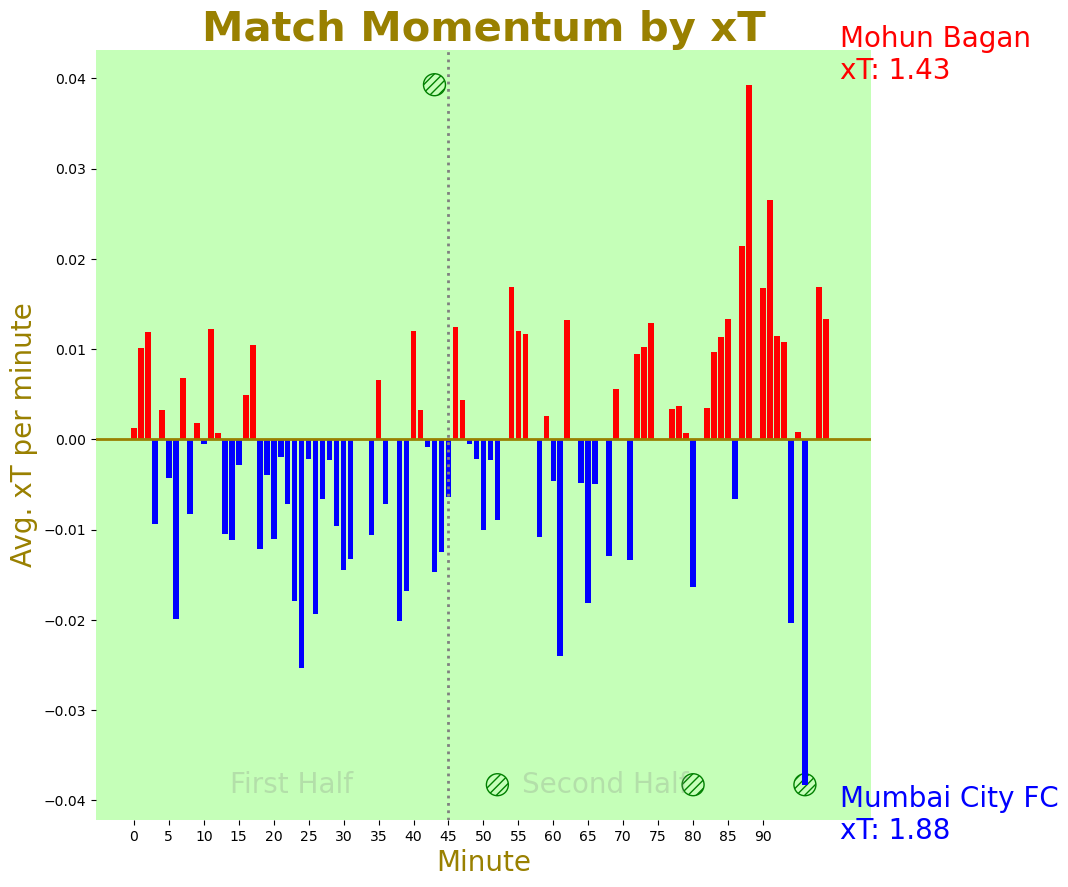

In [140]:
Momentumdf = df
# multiplying the away teams xT values with -1 so that I can plot them in the opposite of home teams
Momentumdf.loc[Momentumdf['team_name'] == ateamName, 'start_zone_value_xT'] *= -1
# taking average xT per minute
Momentumdf = Momentumdf.groupby('timeMin')['start_zone_value_xT'].mean()
Momentumdf = Momentumdf.reset_index()
Momentumdf.columns = ['timeMin', 'average_xT']
Momentumdf['average_xT'].fillna(0, inplace=True)

def plot_Momentum(ax):
  # Set colors based on positive or negative values
  colors = [hcol if x > 0 else acol for x in Momentumdf['average_xT']]

  # making a list of munutes when goals are scored
  hgoal_list = homedf[(homedf['typeId'] == 'Goal')]['timeMin'].tolist()
  agoal_list = awaydf[(awaydf['typeId'] == 'Goal')]['timeMin'].tolist()

  hxT = homedf['xT'].sum().round(2)
  axT = awaydf['xT'].sum().round(2)
  # plotting scatters when goals are scored
  highest_xT = Momentumdf['average_xT'].max()
  lowest_xT = Momentumdf['average_xT'].min()
  highest_minute = Momentumdf['timeMin'].max()
  hscatter_y = [highest_xT]*len(hgoal_list)
  ascatter_y = [lowest_xT]*len(agoal_list)

  ax.text((45/2), lowest_xT, 'First Half', color='gray', fontsize=20, alpha=0.25, va='center', ha='center')
  ax.text((45+(45/2)), lowest_xT, 'Second Half', color='gray', fontsize=20, alpha=0.25, va='center', ha='center')

  ax.scatter(hgoal_list, hscatter_y, s=250, c='None', edgecolor='green', hatch='////', marker='o')
  ax.scatter(agoal_list, ascatter_y, s=250, c='None', edgecolor='green', hatch='////', marker='o')
  # Creating the bar plot
  ax.bar(Momentumdf['timeMin'], Momentumdf['average_xT'], color=colors)
  ax.set_xticks(range(0, len(Momentumdf['timeMin']), 5))
  ax.axvline(45, color='gray', linewidth=2, linestyle='dotted')
  ax.set_facecolor(bg_color)
  # Hide spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  # # Hide ticks
  # ax.tick_params(axis='both', which='both', length=0)
  # ax.tick_params(axis='x', colors=line_color)
  # ax.tick_params(axis='y', colors=bg_color)
  # Add labels and title
  ax.set_xlabel('Minute', color=line_color, fontsize=20)
  ax.set_ylabel('Avg. xT per minute', color=line_color, fontsize=20)
  ax.axhline(y=0, color=line_color, alpha=1, linewidth=2)

  ax.text(highest_minute+1,highest_xT, f"{hteamName}\nxT: {hxT}", color=hcol, fontsize=20, va='bottom', ha='left')
  ax.text(highest_minute+1,lowest_xT,  f"{ateamName}\nxT: {axT}", color=acol, fontsize=20, va='top', ha='left')

  ax.set_title('Match Momentum by xT', color=line_color, fontsize=30, fontweight='bold')

fig,ax=plt.subplots(figsize=(10,10))
plot_Momentum(ax)

# Important note: If you run this code first time, everything will be correctly shown in the plot, but running the code second time creates a problem. As I am multiplying with -1 as I shown before, while running the code
#                 for second time all those negative values again gets multiplied by -1, so becomes positive value. Then running the code 3rd time becomes correct again, so in this way all the odd number of times runnig this code
#                 works. 

Match Stats

In [141]:
#Here I have calculated a lot of stats, all of them I couldn't show in the viz because of lack of spaces, but I kept those in the code
# Passing Stats
#Possession%
hpossdf = df[(df['team_name']==hteamName) & (df['typeId']=='Pass')]
apossdf = df[(df['team_name']==ateamName) & (df['typeId']=='Pass')]
hposs = round((len(hpossdf)/(len(hpossdf)+len(apossdf)))*100,2)
aposs = round((len(apossdf)/(len(hpossdf)+len(apossdf)))*100,2)
#Field Tilt%
hftdf = df[(df['team_name']==hteamName) & (df['x']>=80)]
aftdf = df[(df['team_name']==ateamName) & (df['x']>=80)]
hft = round((len(hftdf)/(len(hftdf)+len(aftdf)))*100,2)
aft = round((len(aftdf)/(len(hftdf)+len(aftdf)))*100,2)
#Total Passes
htotalPass = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass')])
atotalPass = len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass')])
#Accurate Pass
hAccPass = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['outcome']=='Successful')])
aAccPass = len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['outcome']=='Successful')])
#Accurate Pass (without defensive third)
hAccPasswdt = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['outcome']=='Successful') & (df['end_x']>40)])
aAccPasswdt = len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['outcome']=='Successful') & (df['end_x']>40)])
#LongBall
hLongB = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['lb']=='Long ball') & (df['x']<=119) & (df['cross']!='Cross')])
aLongB = len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['lb']=='Long ball') & (df['x']<=119) & (df['cross']!='Cross')])
#Accurate LongBall
hAccLongB = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['lb']=='Long ball') & (df['x']<=119) & (df['cross']!='Cross') & (df['outcome']=='Successful')])
aAccLongB = len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['lb']=='Long ball') & (df['x']<=119) & (df['cross']!='Cross') & (df['outcome']=='Successful')])
#Crosses
hCrss= len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['cross']=='Cross')])
aCrss= len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['cross']=='Cross')])
#Accurate Crosses
hAccCrss= len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['cross']=='Cross') & (df['outcome']=='Successful')])
aAccCrss= len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['cross']=='Cross') & (df['outcome']=='Successful')])

#ThrowIn
htins= len(df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['ThrowIn']=='Throw-in')])
atins= len(df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['ThrowIn']=='Throw-in')])


### Defensive Stats

#Tackles
htkl = len(df[(df['team_name']==hteamName) & (df['typeId']=='Tackle')])
atkl = len(df[(df['team_name']==ateamName) & (df['typeId']=='Tackle')])
#Tackles Won
htklw = len(df[(df['team_name']==hteamName) & (df['typeId']=='Tackle') & (df['outcome']=='Successful')])
atklw = len(df[(df['team_name']==ateamName) & (df['typeId']=='Tackle') & (df['outcome']=='Successful')])
#Interceptions
hintc= len(df[(df['team_name']==hteamName) & (df['typeId']=='Interception')])
aintc= len(df[(df['team_name']==ateamName) & (df['typeId']=='Interception')])
#Clearances
hclr= len(df[(df['team_name']==hteamName) & (df['typeId']=='Clearance')])
aclr= len(df[(df['team_name']==ateamName) & (df['typeId']=='Clearance')])
#Aerials
harl= len(df[(df['team_name']==hteamName) & (df['typeId']=='Aerial')])
aarl= len(df[(df['team_name']==ateamName) & (df['typeId']=='Aerial')])
#Aerials Wins
harlw= len(df[(df['team_name']==hteamName) & (df['typeId']=='Aerial') & (df['outcome']=='Successful')])
aarlw= len(df[(df['team_name']==ateamName) & (df['typeId']=='Aerial') & (df['outcome']=='Successful')])
#Ball recovery
hblrc= len(df[(df['team_name']==hteamName) & (df['typeId']=='Ball recovery')])
ablrc= len(df[(df['team_name']==ateamName) & (df['typeId']=='Ball recovery')])


def plotting_match_stats(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=bg_color, linewidth=2)
  pitch.draw(ax=ax)

  # plotting the headline box
  head_y = [74,80,80,74]
  head_x = [0,0,120,120]
  ax.fill(head_x, head_y, 'orange')
  ax.text(60,77, "Match Stats", ha='center', va='center', color=line_color, fontsize=25, fontweight='bold', path_effects=path_eff)

  # Stats bar diagram
  stats_title = [70, 70-(1*6), 70-(2*6), 70-(3*6), 70-(4*6), 70-(5*6), 70-(6*6), 70-(7*6), 70-(8*6), 70-(9*6), 70-(10*6)] # y co-ordinate values of the bars
  stats_home = [hposs, hft, htotalPass, hLongB, hCrss, htins, htkl, hintc, hclr, harl, hblrc]
  stats_away = [aposs, aft, atotalPass, aLongB, aCrss, atins, atkl, aintc, aclr, aarl, ablrc]

  stats_normalized_home = [-(hposs/(hposs+aposs))*50, -(hft/(hft+aft))*50, -(htotalPass/(htotalPass+atotalPass))*50,
                                        -(hLongB/(hLongB+aLongB))*50, -(hCrss/(hCrss+aCrss))*50, -(htins/(htins+atins))*50, -(htkl/(htkl+atkl))*50,       # put a (-) sign before each value so that the
                                        -(hintc/(hintc+aintc))*50, -(hclr/(hclr+aclr))*50, -(harl/(harl+aarl))*50, -(hblrc/(hblrc+ablrc))*50]          # home stats bar shows in the opposite of away
  stats_normalized_away = [(aposs/(hposs+aposs))*50, (aft/(hft+aft))*50, (atotalPass/(htotalPass+atotalPass))*50,
                                        (aLongB/(hLongB+aLongB))*50, (aCrss/(hCrss+aCrss))*50, (atins/(htins+atins))*50, (atkl/(htkl+atkl))*50,
                                        (aintc/(hintc+aintc))*50, (aclr/(hclr+aclr))*50, (aarl/(harl+aarl))*50, (ablrc/(hblrc+ablrc))*50]

  start_x = 60
  ax.barh(stats_title, stats_normalized_home, height=4, color=hcol, left=start_x)
  ax.barh(stats_title, stats_normalized_away, height=4, left=start_x, color=acol)
  # Turn off axis-related elements
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
  ax.set_xticks([])
  ax.set_yticks([])

  # Plotting the texts
  ax.text(60, 70, "Possession", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(1*6), "Field Tilt", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(2*6), "Passes (Acc.)", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(3*6), "LongBalls (Acc.)", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(4*6), "Crosses", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(5*6), "ThrowIns", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(6*6), "Tackles (Wins)", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(7*6), "Interceptions", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(8*6), "Clearence", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(9*6), "Aerials (Wins)", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)
  ax.text(60, 70-(10*6), "Ball Recoveries", color=line_color, fontsize=17, ha='center', va='center', fontweight='bold', path_effects=path_eff)

  ax.text(0, 70, f"{round(hposs)}%", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(1*6), f"{round(hft)}%", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(2*6), f"{htotalPass}({hAccPass})", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(3*6), f"{hLongB}({hAccLongB})", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(4*6), f"{hCrss}", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(5*6), f"{htins}", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(6*6), f"{htkl}({htklw})", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(7*6), f"{hintc}", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(8*6), f"{hclr}", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(9*6), f"{harl}({harlw})", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')
  ax.text(0, 70-(10*6), f"{hblrc}", color=line_color, fontsize=20, ha='right', va='center', fontweight='bold')

  ax.text(120, 70, f"{round(aposs)}%", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(1*6), f"{round(aft)}%", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(2*6), f"{atotalPass}({aAccPass})", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(3*6), f"{aLongB}({aAccLongB})", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(4*6), f"{aCrss}", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(5*6), f"{atins}", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(6*6), f"{atkl}({atklw})", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(7*6), f"{aintc}", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(8*6), f"{aclr}", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(9*6), f"{aarl}({aarlw})", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')
  ax.text(120, 70-(10*6), f"{ablrc}", color=line_color, fontsize=20, ha='left', va='center', fontweight='bold')

  ax.invert_yaxis()

# fig,ax=plt.subplots(figsize=(10,10))
# plotting_match_stats(ax)

High Turnover

In [142]:
def HighTO(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
  pitch.draw(ax=ax)
  ax.set_ylim(-0.5,80.5)
  ax.set_xlim(-0.5,120.5)

  # filtering the high turnovers (winning the possession inside the 40m radius from opponent goal)
  home_TO = df[(df['team_name']==hteamName) & ((df['typeId']=='Ball recovery') | (df['typeId']=='Interception')) & (df['x']>=80)]
  away_TO = df[(df['team_name']==ateamName) & ((df['typeId']=='Ball recovery') | (df['typeId']=='Interception')) & (df['x']>=80)]

  home_TO['distance'] = ((home_TO['x'] - 120)**2 + (home_TO['y'] - 40)**2)**0.5
  home_TO = home_TO[home_TO['distance']<=47]
  away_TO['distance'] = ((away_TO['x'] - 120)**2 + (away_TO['y'] - 40)**2)**0.5
  away_TO = away_TO[away_TO['distance']<=47]

  hto_count = len(home_TO)
  ato_count = len(away_TO)

  # scattering those
  ax.scatter((120-home_TO.x), (80-home_TO.y), s=250, c=hcol, edgecolor=line_color, marker='o', linewidth=2)
  ax.scatter((away_TO.x), (away_TO.y), s=250, c=acol, edgecolor=line_color, marker='o', linewidth=2)

  # Plotting the half circle
  left_circle = plt.Circle((0,40), 47, color=hcol, fill=True, alpha=0.25, linestyle='dashed')
  ax.add_artist(left_circle)
  right_circle = plt.Circle((120,40), 47, color=acol, fill=True, alpha=0.25, linestyle='dashed')
  ax.add_artist(right_circle)
  # Set the aspect ratio to be equal
  ax.set_aspect('equal', adjustable='box')
  # Headlines and other texts
  ax.text(0, 82, f"{hteamName}\nHigh Turnovers: {hto_count}", color=hcol, size=20, ha='left', va='bottom', fontweight='bold')
  ax.text(120, 82, f"{ateamName}\nHigh Turnovers: {ato_count}", color=acol, size=20, ha='right', va='bottom', fontweight='bold')

# fig,ax=plt.subplots(figsize=(10,10))
# HighTO(ax)

Cross

In [143]:
def Crosses(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
  pitch.draw(ax=ax)
  ax.set_ylim(-0.5,80.5)
  ax.set_xlim(-0.5,120.5)

  home_cross = df[(df['team_name']==hteamName) & (df['typeId']=='Pass') & (df['cross']=='Cross') & (df['x']<=119)]
  away_cross = df[(df['team_name']==ateamName) & (df['typeId']=='Pass') & (df['cross']=='Cross') & (df['x']<=119)]

  hsuc = 0
  hunsuc = 0
  asuc = 0
  aunsuc = 0

  # iterating through each pass and coloring according to successful or not
  for index, row in home_cross.iterrows():
    if row['outcome'] == 'Successful':
      arrow = patches.FancyArrowPatch((120-row['x'], 80-row['y']), (120-row['end_x'], 80-row['end_y']), arrowstyle='->', mutation_scale=15, 
                                      color='green', linewidth=1.5, alpha=1)      # the x and y points are substracted from pitch length and width
      ax.add_patch(arrow)                                                                                                                                                             # to show both home and away passes in the same pitch
      hsuc += 1
    else:
      arrow = patches.FancyArrowPatch((120-row['x'], 80-row['y']), (120-row['end_x'], 80-row['end_y']), arrowstyle='->', mutation_scale=10, 
                                      color='red', linewidth=1.5, alpha=.65)
      ax.add_patch(arrow)
      hunsuc += 1

  for index, row in away_cross.iterrows():
    if row['outcome'] == 'Successful':
      arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', mutation_scale=15, 
                                      color='green', linewidth=1.5, alpha=1)
      ax.add_patch(arrow)
      asuc += 1
    else:
      arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), arrowstyle='->', mutation_scale=10, 
                                      color='red', linewidth=1.5, alpha=.65)
      ax.add_patch(arrow)
      aunsuc += 1

  # Headlines and other texts
  home_left = len(home_cross[home_cross['y']>=40])
  home_right = len(home_cross[home_cross['y']<40])
  away_left = len(away_cross[away_cross['y']>=40])
  away_right = len(away_cross[away_cross['y']<40])

  ax.text(59, 2, f"Crosses from\nLeftwing: {home_left}", color='orange', fontsize=15, va='bottom', ha='right')
  ax.text(59, 78, f"Crosses from\nRightwing: {home_right}", color='orange', fontsize=15, va='top', ha='right')
  ax.text(61, 78, f"Crosses from\nLeftwing: {away_left}", color=acol, fontsize=15, va='top', ha='left')
  ax.text(61, 2, f"Crosses from\nRightwing: {away_right}", color=acol, fontsize=15, va='bottom', ha='left')

  ax.text(0,-2, f"Successful: {hsuc}", color='green', fontsize=20, ha='left', va='top')
  ax.text(0,-5.5, f"Unsuccessful: {hunsuc}", color='red', fontsize=20, ha='left', va='top')
  ax.text(120,-2, f"Successful: {asuc}", color='green', fontsize=20, ha='right', va='top')
  ax.text(120,-5.5, f"Unsuccessful: {aunsuc}", color='red', fontsize=20, ha='right', va='top')

  ax.text(0, 82, f"{hteamName}\nCrosses", color=hcol, size=20, ha='left', fontweight='bold')
  ax.text(120, 82, f"{ateamName}\nCrosses", color=acol, size=20, ha='right', fontweight='bold')

# fig,ax=plt.subplots(figsize=(10,10))
# Crosses(ax)

# Final VIZ

C:\Users\h\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\h\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\h\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\h\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

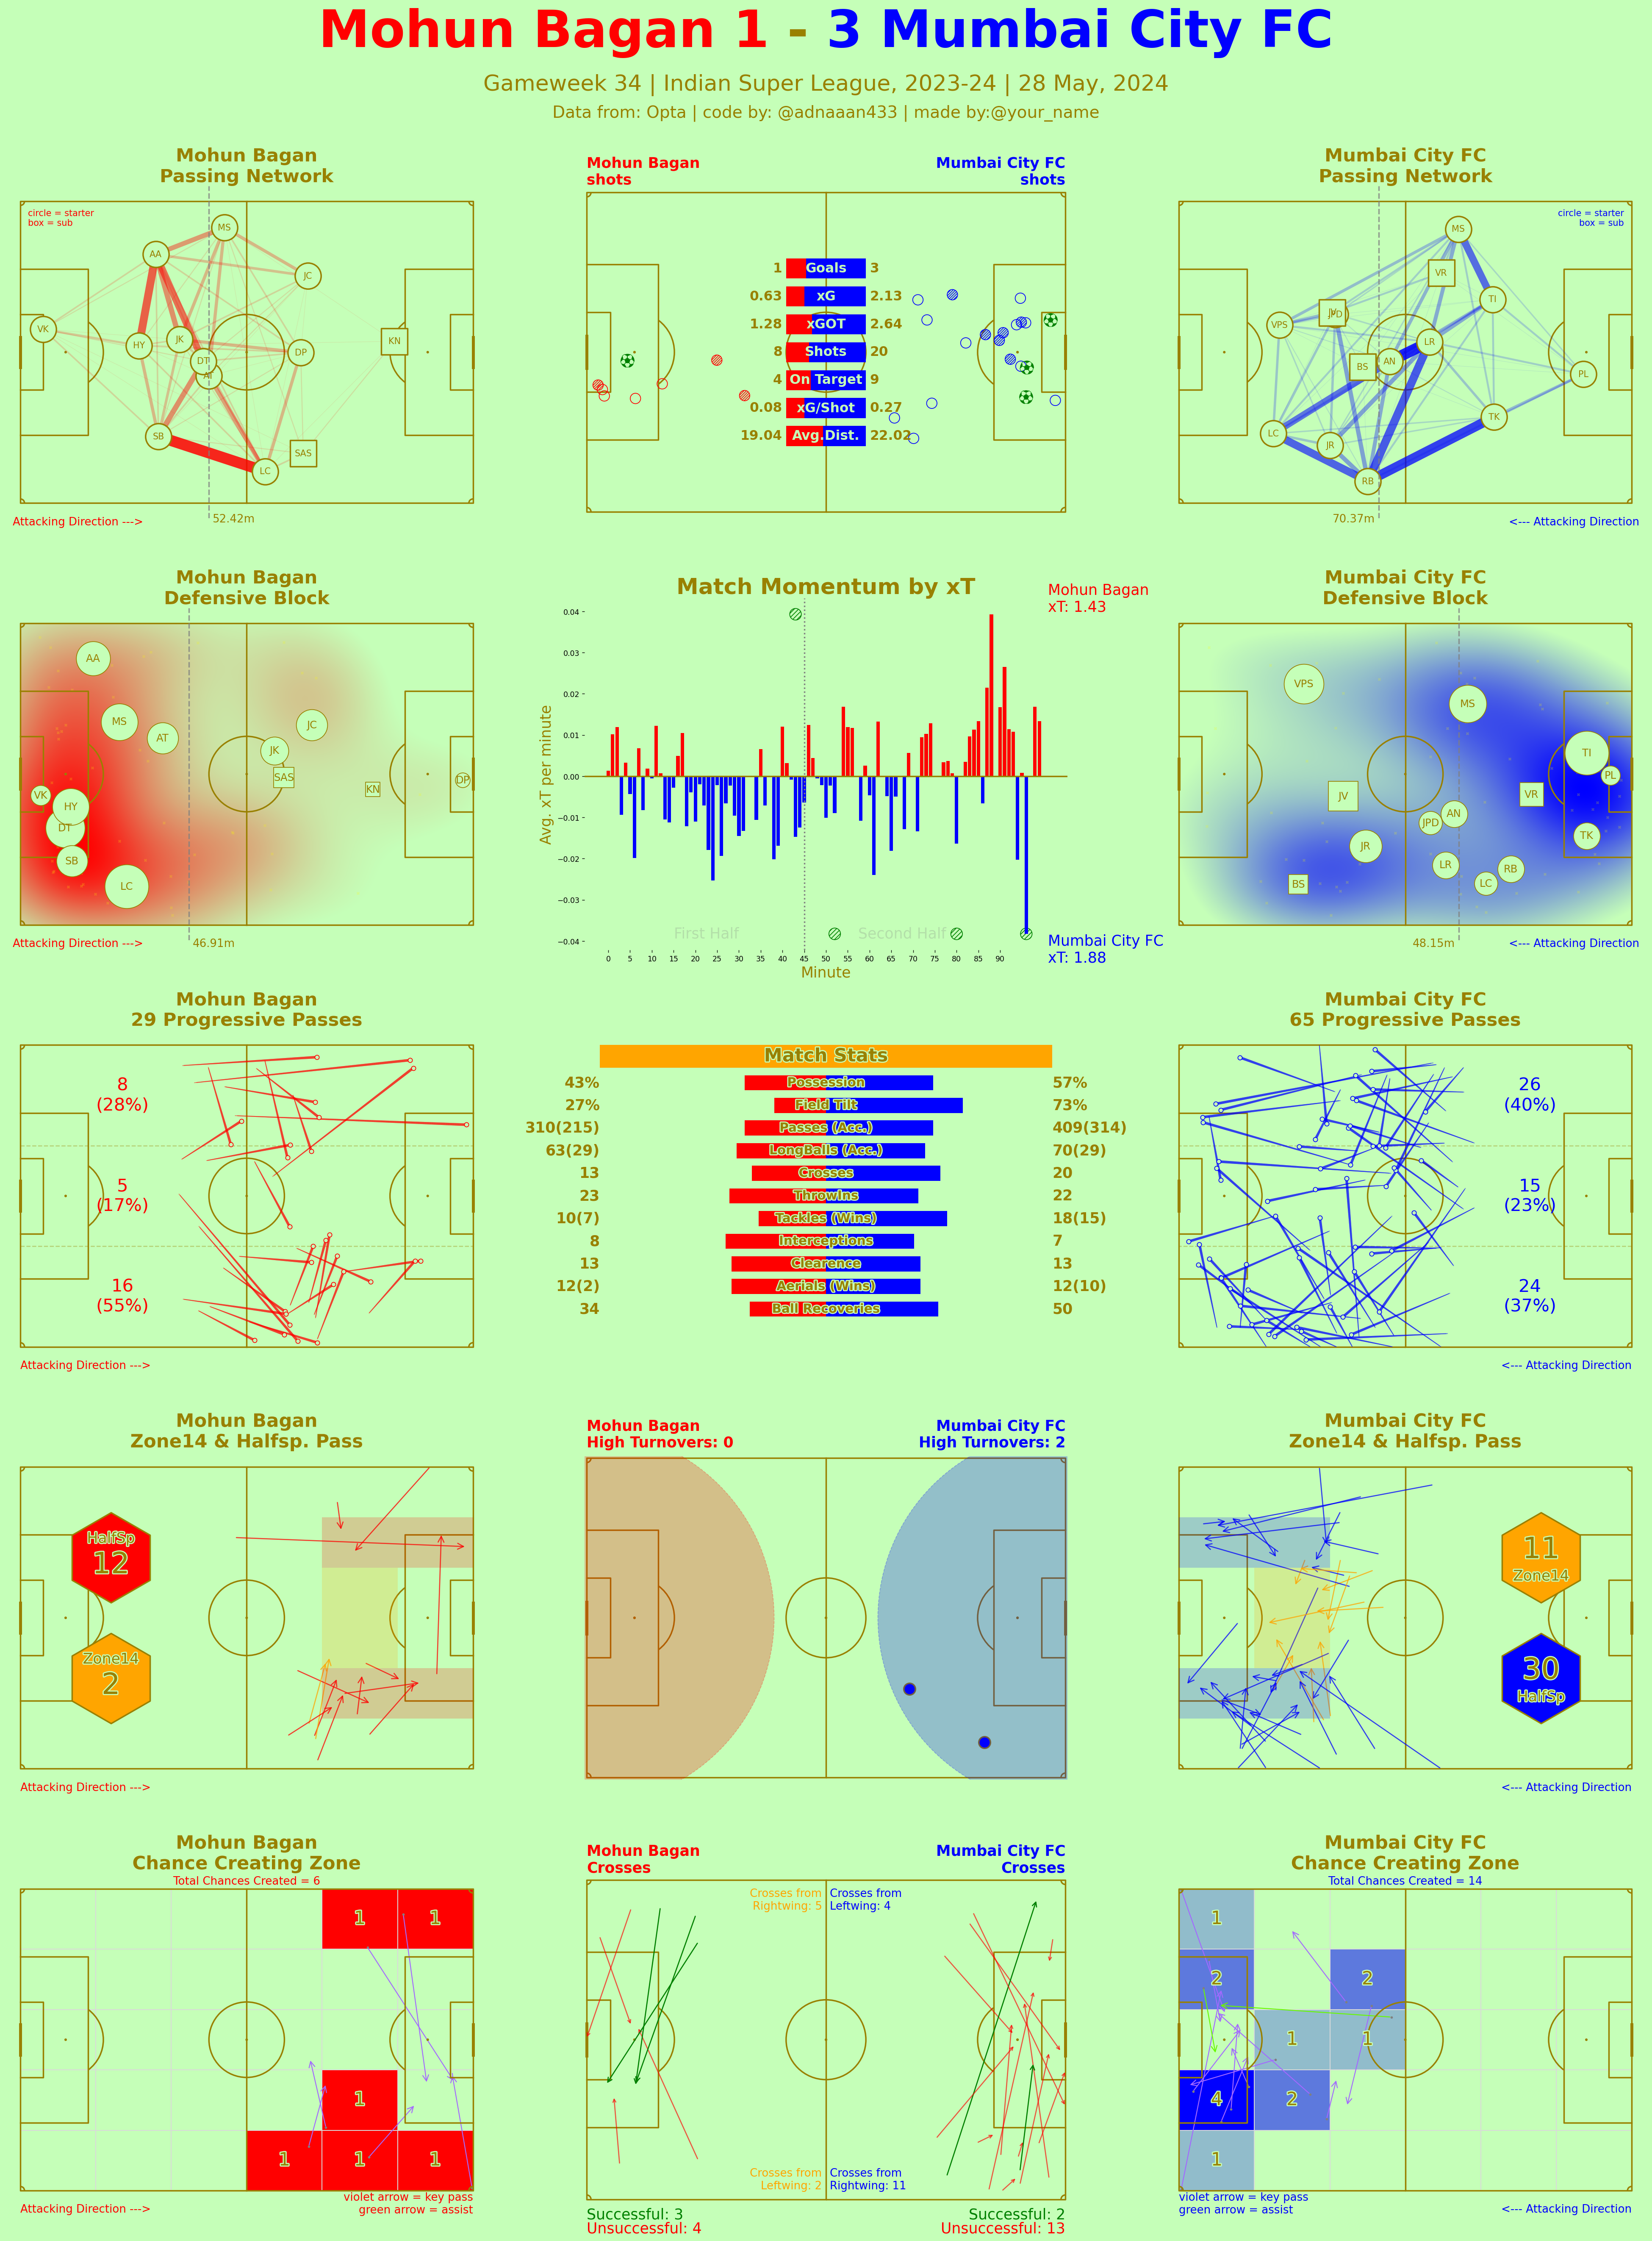

In [144]:
fig, axs = plt.subplots(5,3, figsize=(40,50), dpi=125, facecolor=bg_color)

pass_network_visualization(axs[0,0], home_passes_between_df, home_average_locs_and_count_df, hcol, hteamName, flipped=False)
plot_shotmap(axs[0,1])
pass_network_visualization(axs[0,2], away_passes_between_df, away_average_locs_and_count_df, acol, ateamName, flipped=False)

defensive_block(axs[1,0], defensive_home_average_locs_and_count_df, hteamName, hteamName, hcol)
plot_Momentum(axs[1,1])
defensive_block(axs[1,2], defensive_away_average_locs_and_count_df, ateamName, ateamName, acol)

draw_progressive_pass_map(axs[2,0], df, hteamName, hcol)
plotting_match_stats(axs[2,1])
draw_progressive_pass_map(axs[2,2], df, ateamName, acol)

draw_pass_map(axs[3,0], dfhp, hteamName, hcol)
HighTO(axs[3,1])
draw_pass_map(axs[3,2], dfap, ateamName, acol)
Chance_creating_zone(axs[4,0], dfchch, hteamName, pearl_earring_cmaph, hcol)
Crosses(axs[4,1])
Chance_creating_zone(axs[4,2], dfchca, ateamName, pearl_earring_cmapa, acol)

# Players viz functions

In [145]:
# Get unique players
home_unique_players = homedf['playerName'].unique()
away_unique_players = awaydf['playerName'].unique()

# Initialize an empty dictionary to store home players different typeId of shot sequence counts
home_shot_seq_counts = {'playerName': home_unique_players, 'Shots': [], 'Shot Assist': [], 'Buildup to shot': []}

# Putting counts in those lists
for playerName in home_unique_players:
    home_shot_seq_counts['Shots'].append(len(df[(df['playerName'] == playerName) & ((df['typeId']=='Miss') | (df['typeId']=='Attempt Saved') | (df['typeId']=='Post') | (df['typeId']=='Goal'))]))
    home_shot_seq_counts['Shot Assist'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass']==1)]))
    home_shot_seq_counts['Buildup to shot'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass'].shift(-1)==1)]))

# converting that list into a dataframe
home_sh_sq_df = pd.DataFrame(home_shot_seq_counts)
home_sh_sq_df['total'] = home_sh_sq_df['Shots']+home_sh_sq_df['Shot Assist']+home_sh_sq_df['Buildup to shot']
home_sh_sq_df = home_sh_sq_df.sort_values(by='total', ascending=False)
home_sh_sq_df.reset_index(drop=True, inplace=True)
home_sh_sq_df = home_sh_sq_df.head(5)
home_sh_sq_df['shortName'] = home_sh_sq_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store away players different typeId of shot sequence counts
away_shot_seq_counts = {'playerName': away_unique_players, 'Shots': [], 'Shot Assist': [], 'Buildup to shot': []}

for playerName in away_unique_players:
    away_shot_seq_counts['Shots'].append(len(df[(df['playerName'] == playerName) & ((df['typeId']=='Miss') | (df['typeId']=='Attempt Saved') | (df['typeId']=='Post') | (df['typeId']=='Goal'))]))
    away_shot_seq_counts['Shot Assist'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass']==1)]))
    away_shot_seq_counts['Buildup to shot'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass'].shift(-1)==1)]))

away_sh_sq_df = pd.DataFrame(away_shot_seq_counts)
away_sh_sq_df['total'] = away_sh_sq_df['Shots']+away_sh_sq_df['Shot Assist']+away_sh_sq_df['Buildup to shot']
away_sh_sq_df = away_sh_sq_df.sort_values(by='total', ascending=False)
away_sh_sq_df.reset_index(drop=True, inplace=True)
away_sh_sq_df = away_sh_sq_df.head(5)
away_sh_sq_df['shortName'] = away_sh_sq_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store home players different typeId of pass counts
home_pass_types_counts = {'playerName': home_unique_players, 'Progressive Passes': [], 'Passes into pen. box': [], 'Key Passes': []}

for playerName in home_unique_players:
    home_pass_types_counts['Progressive Passes'].append(len(df[(df['playerName'] == playerName) & (df['pro'] > 9.144) & (df['outcome']=='Successful') & (df['x']>=40) &
                                                            (df['x']<=119)]))
    home_pass_types_counts['Passes into pen. box'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['end_x']>=103.5) & (df['end_y']>=16) & (df['end_y']<=64)]))
    home_pass_types_counts['Key Passes'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass']==1)]))

home_passer_df = pd.DataFrame(home_pass_types_counts)
home_passer_df['total'] = home_passer_df['Progressive Passes']+home_passer_df['Passes into pen. box']+home_passer_df['Key Passes']
home_passer_df = home_passer_df.sort_values(by='total', ascending=False)
home_passer_df.reset_index(drop=True, inplace=True)
home_passer_df = home_passer_df.head(5)
home_passer_df['shortName'] = home_passer_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store away players different typeId of pass counts
away_pass_types_counts = {'playerName': away_unique_players, 'Progressive Passes': [], 'Passes into pen. box': [], 'Key Passes': []}

for playerName in away_unique_players:
    away_pass_types_counts['Progressive Passes'].append(len(df[(df['playerName'] == playerName) & (df['pro'] > 9.144) & (df['outcome']=='Successful') & (df['x']>=40) &
                                                            (df['x']<=119)]))
    away_pass_types_counts['Passes into pen. box'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['outcome'] == 'Successful') & (df['end_x']>=103.5) & (df['end_y']>=16) & (df['end_y']<=64)]))
    away_pass_types_counts['Key Passes'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass']==1)]))

away_passer_df = pd.DataFrame(away_pass_types_counts)
away_passer_df['total'] = away_passer_df['Progressive Passes']+away_passer_df['Passes into pen. box']+away_passer_df['Key Passes']
away_passer_df = away_passer_df.sort_values(by='total', ascending=False)
away_passer_df.reset_index(drop=True, inplace=True)
away_passer_df = away_passer_df.head(5)
away_passer_df['shortName'] = away_passer_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store home players different typeId of defensive actions counts
home_defensive_actions_counts = {'playerName': home_unique_players, 'Tackles': [], 'Interceptions': [], 'Clearance': []}

for playerName in home_unique_players:
    home_defensive_actions_counts['Tackles'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Tackle') & (df['outcome']=='Successful')]))
    home_defensive_actions_counts['Interceptions'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Interception')]))
    home_defensive_actions_counts['Clearance'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Clearance')]))

home_defender_df = pd.DataFrame(home_defensive_actions_counts)
home_defender_df['total'] = home_defender_df['Tackles']+home_defender_df['Interceptions']+home_defender_df['Clearance']
home_defender_df = home_defender_df.sort_values(by='total', ascending=False)
home_defender_df.reset_index(drop=True, inplace=True)
home_defender_df = home_defender_df.head(5)
home_defender_df['shortName'] = home_defender_df['playerName'].apply(get_short_name)

# Initialize an empty dictionary to store away players different typeId of defensive actions counts
away_defensive_actions_counts = {'playerName': away_unique_players, 'Tackles': [], 'Interceptions': [], 'Clearance': []}

for playerName in away_unique_players:
    away_defensive_actions_counts['Tackles'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Tackle') & (df['outcome']=='Successful')]))
    away_defensive_actions_counts['Interceptions'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Interception')]))
    away_defensive_actions_counts['Clearance'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Clearance')]))

away_defender_df = pd.DataFrame(away_defensive_actions_counts)
away_defender_df['total'] = away_defender_df['Tackles']+away_defender_df['Interceptions']+away_defender_df['Clearance']
away_defender_df = away_defender_df.sort_values(by='total', ascending=False)
away_defender_df.reset_index(drop=True, inplace=True)
away_defender_df = away_defender_df.head(5)
away_defender_df['shortName'] = away_defender_df['playerName'].apply(get_short_name)

In [146]:
# Get unique players (same things as before, but this time both home and away teams combined)
unique_players = df['playerName'].unique()


# Initialize an empty dictionary to store players different type of shot sequence counts
shot_seq_counts = {'playerName': unique_players, 'Shots': [], 'Shot Assist': [], 'Buildup to shot': []}

for name in unique_players:
    shot_seq_counts['Shots'].append(len(df[(df['playerName'] == name) & (df['typeId'].isin(['Miss', 'Attempt Saved', 'Post', 'Goal']))]))
    shot_seq_counts['Shot Assist'].append(len(df[(df['playerName'] == name) & (df['typeId'] == 'Pass') & (df['keyPass']==1.0)]))
    shot_seq_counts['Buildup to shot'].append(len(df[(df['playerName'] == name) & (df['typeId'] == 'Pass') & (df['keyPass'].shift(-1)==1)]))

sh_sq_df = pd.DataFrame(shot_seq_counts)
sh_sq_df['total'] = sh_sq_df['Shots']+sh_sq_df['Shot Assist']+sh_sq_df['Buildup to shot']
sh_sq_df = sh_sq_df.sort_values(by='total', ascending=False)
sh_sq_df.reset_index(drop=True, inplace=True)
sh_sq_df = sh_sq_df.head(10)
sh_sq_df['shortName'] = sh_sq_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store home players different typeId of pass counts
pass_types_counts = {'playerName': unique_players, 'Progressive Passes': [], 'Passes into pen. box': [], 'Key Passes': []}

for playerName in unique_players:
    pass_types_counts['Progressive Passes'].append(len(df[(df['playerName'] == playerName) & (df['pro'] > 9.144)  & (df['outcome']=='Successful') & (df['x']>=40) &
                                                            (df['x']<=119)]))
    pass_types_counts['Passes into pen. box'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['outcome'] == 'Successful') & (df['end_x']>=103.5) & (df['end_y']>=16) & (df['end_y']<=64)]))
    pass_types_counts['Key Passes'].append(len(df[(df['playerName'] == playerName) & (df['typeId'] == 'Pass') & (df['keyPass']==1)]))

passer_df = pd.DataFrame(pass_types_counts)
passer_df['total'] = passer_df['Progressive Passes']+passer_df['Passes into pen. box']+passer_df['Key Passes']
passer_df = passer_df.sort_values(by='total', ascending=False)
passer_df.reset_index(drop=True, inplace=True)
passer_df = passer_df.head(10)
passer_df['shortName'] = passer_df['playerName'].apply(get_short_name)


# Initialize an empty dictionary to store players different type of defensive actions counts
defensive_actions_counts = {'playerName': unique_players, 'Tackles': [], 'Interceptions': [], 'Clearance': []}

for name in unique_players:
    defensive_actions_counts['Tackles'].append(len(df[(df['playerName'] == name) & (df['typeId'] == 'Tackle') & (df['outcome']=='Successful')]))
    defensive_actions_counts['Interceptions'].append(len(df[(df['playerName'] == name) & (df['typeId'] == 'Interception')]))
    defensive_actions_counts['Clearance'].append(len(df[(df['playerName'] == name) & (df['typeId'] == 'Clearance')]))

defender_df = pd.DataFrame(defensive_actions_counts)
defender_df['total'] = defender_df['Tackles']+defender_df['Interceptions']+defender_df['Clearance']
defender_df = defender_df.sort_values(by='total', ascending=False)
defender_df.reset_index(drop=True, inplace=True)
defender_df = defender_df.head(10)
defender_df['shortName'] = defender_df['playerName'].apply(get_short_name)

Top Passer Pass Map

In [147]:
def home_player_passmap(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
  pitch.draw(ax=ax)

  # taking the top home passer and plotting his passmap
  home_player_name = home_passer_df['playerName'].iloc[0]
  home_playerdf = df[(df['playerName']==home_player_name) & (df['typeId']=='Pass')]

  pass_comp = home_playerdf[home_playerdf['outcome']=='Successful']
  pass_incomp = home_playerdf[home_playerdf['outcome']=='Unsuccessful']
  kp = home_playerdf[home_playerdf['keyPass']==1]
  assist = home_playerdf[home_playerdf['assist']==1]

  comp = pitch.lines(pass_comp.x, pass_comp.y, pass_comp.end_x, pass_comp.end_y, lw=3, transparent=True, comet=True, color=hcol, ax=ax, alpha=0.65)
  incomp = pitch.lines(pass_incomp.x, pass_incomp.y, pass_incomp.end_x, pass_incomp.end_y, lw=3, transparent=True, comet=True, color='gray', ax=ax, alpha=0.25)
  keypass = pitch.lines(kp.x, kp.y, kp.end_x, kp.end_y, lw=4, transparent=True, comet=True, color=violet, ax=ax, alpha=0.9)
  aline = pitch.lines(assist.x, assist.y, assist.end_x, assist.end_y, lw=4, transparent=True, comet=True, color=green, ax=ax, alpha=1)

  sc1 = pitch.scatter(pass_comp.end_x, pass_comp.end_y, s=30, color=bg_color, edgecolor=hcol, zorder=2, ax=ax)
  sc2 = pitch.scatter(pass_incomp.end_x, pass_incomp.end_y, s=30, color=bg_color, edgecolor='gray', alpha=0.25, zorder=2, ax=ax)
  sc3 = pitch.scatter(kp.end_x, kp.end_y, s=40, color=bg_color, edgecolor=violet, linewidth=1.5, zorder=2, ax=ax)
  sc4 = pitch.scatter(assist.end_x, assist.end_y, s=50, color=bg_color, edgecolor=green, linewidth=1.5, zorder=2, ax=ax)

  ax.text(80, 83, f'Successful Pass: {len(pass_comp)}', color=hcol, va='center', ha='right', fontsize=12)
  ax.text(120, 83, f'Unsuccessful Pass: {len(pass_incomp)}', color='gray', va='center', ha='right', fontsize=12)
  ax.text(80, 88, f'Key Pass: {len(kp)}', color=violet, va='center', ha='right', fontsize=12)
  ax.text(120, 88, f'Assist: {len(assist)}', color=green, va='center', ha='right', fontsize=12)

  home_name_show = home_passer_df['shortName'].iloc[0]
  ax.text(0,85, "Attacking Direction ----->", color=hcol, fontsize=15, va='center', ha='left')
  ax.set_title(f"{home_name_show} PassMap", color=hcol, fontsize=25, fontweight='bold')

def away_player_passmap(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
  pitch.draw(ax=ax)
  ax.invert_xaxis()
  ax.invert_yaxis()

  # taking the top away passer and plotting his passmap
  away_player_name = away_passer_df['playerName'].iloc[0]
  away_playerdf = df[(df['playerName']==away_player_name) & (df['typeId']=='Pass')]

  pass_comp = away_playerdf[away_playerdf['outcome']=='Successful']
  pass_incomp = away_playerdf[away_playerdf['outcome']=='Unsuccessful']
  kp = away_playerdf[away_playerdf['keyPass']==1]
  assist = away_playerdf[away_playerdf['assist']==1]

  comp = pitch.lines(pass_comp.x, pass_comp.y, pass_comp.end_x, pass_comp.end_y, lw=3, transparent=True, comet=True, color=acol, ax=ax, alpha=0.65)
  incomp = pitch.lines(pass_incomp.x, pass_incomp.y, pass_incomp.end_x, pass_incomp.end_y, lw=3, transparent=True, comet=True, color='gray', ax=ax, alpha=0.25)
  keypass = pitch.lines(kp.x, kp.y, kp.end_x, kp.end_y, lw=4, transparent=True, comet=True, color=violet, ax=ax, alpha=0.9)
  aline = pitch.lines(assist.x, assist.y, assist.end_x, assist.end_y, lw=4, transparent=True, comet=True, color=green, ax=ax, alpha=1)

  sc1 = pitch.scatter(pass_comp.end_x, pass_comp.end_y, s=30, color=bg_color, edgecolor=acol, zorder=2, ax=ax)
  sc2 = pitch.scatter(pass_incomp.end_x, pass_incomp.end_y, s=30, color=bg_color, edgecolor='gray', alpha=0.25, zorder=2, ax=ax)
  sc3 = pitch.scatter(kp.end_x, kp.end_y, s=40, color=bg_color, edgecolor=violet, linewidth=1.5, zorder=2, ax=ax)
  sc4 = pitch.scatter(assist.end_x, assist.end_y, s=50, color=bg_color, edgecolor=green, linewidth=1.5, zorder=2, ax=ax)

  ax.text(85, -3, f'Successful Pass: {len(pass_comp)}', color=acol, va='center', ha='left', fontsize=12)
  ax.text(120, -3, f'Unsuccessful Pass: {len(pass_incomp)}', color='gray', va='center', ha='left', fontsize=12)
  ax.text(85, -8, f'Key Pass: {len(kp)}', color=violet, va='center', ha='left', fontsize=12)
  ax.text(120, -8, f'Assist: {len(assist)}', color=green, va='center', ha='left', fontsize=12)

  away_name_show = away_passer_df['shortName'].iloc[0]
  ax.text(0,-5, "<----- Attacking Direction", color=acol, fontsize=15, va='center', ha='right')
  ax.set_title(f"{away_name_show} PassMap", color=acol, fontsize=25, fontweight='bold')

# fig,ax = plt.subplots(figsize=(10,10))
# away_player_passmap(ax)

Top Player defensive actions

In [148]:
def home_player_def_acts(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, line_zorder=2, linewidth=2)
  pitch.draw(ax=ax)
  ax.set_ylim(-13,80.5)

  # taking the top home defender and plotting his defensive actions
  home_player_name = home_defender_df['playerName'].iloc[0]
  home_playerdf = df[(df['playerName']==home_player_name)]

  hp_tk = home_playerdf[home_playerdf['typeId']=='Tackle']
  hp_intc = home_playerdf[(home_playerdf['typeId']=='Interception')]
  hp_br = home_playerdf[home_playerdf['typeId']=='Ball recovery']
  hp_cl = home_playerdf[home_playerdf['typeId']=='Clearance']
  hp_fl = home_playerdf[home_playerdf['typeId']=='Foul']
  hp_ar = home_playerdf[(home_playerdf['typeId']=='Aerial') & (home_playerdf['x']<=60)]

  sc1 = pitch.scatter(hp_tk.x, hp_tk.y, s=250, c=hcol, lw=2.5, edgecolor=hcol, marker='+', hatch='/////', ax=ax)
  sc2 = pitch.scatter(hp_intc.x, hp_intc.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='s', hatch='/////', ax=ax)
  sc3 = pitch.scatter(hp_br.x, hp_br.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='o', hatch='/////', ax=ax)
  sc4 = pitch.scatter(hp_cl.x, hp_cl.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='d', hatch='/////', ax=ax)
  sc5 = pitch.scatter(hp_fl.x, hp_fl.y, s=250, c=hcol, lw=2.5, edgecolor=hcol, marker='x', hatch='/////', ax=ax)
  sc6 = pitch.scatter(hp_ar.x, hp_ar.y, s=250, c='None', lw=2.5, edgecolor=hcol, marker='^', hatch='/////', ax=ax)

  sc7 =  pitch.scatter(51, -3, s=150, c=hcol, lw=2.5, edgecolor=hcol, marker='+', hatch='/////', ax=ax)
  sc8 =  pitch.scatter(51, -7, s=150, c='None', lw=2.5, edgecolor=hcol, marker='s', hatch='/////', ax=ax)
  sc9 =  pitch.scatter(51, -11, s=150, c='None', lw=2.5, edgecolor=hcol, marker='o', hatch='/////', ax=ax)
  sc10 = pitch.scatter(78, -3, s=150, c='None', lw=2.5, edgecolor=hcol, marker='d', hatch='/////', ax=ax)
  sc11 = pitch.scatter(78, -7, s=150, c=hcol, lw=2.5, edgecolor=hcol, marker='x', hatch='/////', ax=ax)
  sc12 = pitch.scatter(78, -11, s=150, c='None', lw=2.5, edgecolor=hcol, marker='^', hatch='/////', ax=ax)

  ax.text(53, -3, "Tackle", color=hcol, ha='left', va='center', fontsize=13)
  ax.text(53, -7, "Interception", color=hcol, ha='left', va='center', fontsize=13)
  ax.text(53, -11, "Ball recovery", color=hcol, ha='left', va='center', fontsize=13)
  ax.text(81, -3, "Clearance", color=hcol, ha='left', va='center', fontsize=13)
  ax.text(81, -7, "Foul", color=hcol, ha='left', va='center', fontsize=13)
  ax.text(81, -11, "Aerial", color=hcol, ha='left', va='center', fontsize=13)

  home_name_show = home_defender_df['shortName'].iloc[0]
  ax.text(0,-5, "Attacking Direction ----->", color=hcol, fontsize=15, va='center', ha='left')
  ax.set_title(f"{home_name_show} Defensive Actions", color=hcol, fontsize=25, fontweight='bold')

def away_player_def_acts(ax):
  pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, line_zorder=2, linewidth=2)
  pitch.draw(ax=ax)
  ax.set_ylim(-0.5,93)
  ax.invert_xaxis()
  ax.invert_yaxis()

  # taking the top home defender and plotting his defensive actions
  away_player_name = away_defender_df['playerName'].iloc[0]
  away_playerdf = df[(df['playerName']==away_player_name)]

  ap_tk = away_playerdf[away_playerdf['typeId']=='Tackle']
  ap_intc = away_playerdf[(away_playerdf['typeId']=='Interception')]
  ap_br = away_playerdf[away_playerdf['typeId']=='Ball recovery']
  ap_cl = away_playerdf[away_playerdf['typeId']=='Clearance']
  ap_fl = away_playerdf[away_playerdf['typeId']=='Foul']
  ap_ar = away_playerdf[(away_playerdf['typeId']=='Aerial') & (away_playerdf['x']<=60)]

  sc1 = pitch.scatter(ap_tk.x, ap_tk.y, s=250, c=acol, lw=2.5, edgecolor=acol, marker='+', hatch='/////', ax=ax)
  sc2 = pitch.scatter(ap_intc.x, ap_intc.y, s=250, c='None', lw=2.5, edgecolor=acol, marker='s', hatch='/////', ax=ax)
  sc3 = pitch.scatter(ap_br.x, ap_br.y, s=250, c='None', lw=2.5, edgecolor=acol, marker='o', hatch='/////', ax=ax)
  sc4 = pitch.scatter(ap_cl.x, ap_cl.y, s=250, c='None', lw=2.5, edgecolor=acol, marker='d', hatch='/////', ax=ax)
  sc5 = pitch.scatter(ap_fl.x, ap_fl.y, s=250, c=acol, lw=2.5, edgecolor=acol, marker='x', hatch='/////', ax=ax)
  sc6 = pitch.scatter(ap_ar.x, ap_ar.y, s=250, c='None', lw=2.5, edgecolor=acol, marker='^', hatch='/////', ax=ax)

  sc7 =  pitch.scatter(51, 83, s=150, c=acol, lw=2.5, edgecolor=acol, marker='+', hatch='/////', ax=ax)
  sc8 =  pitch.scatter(51, 87, s=150, c='None', lw=2.5, edgecolor=acol, marker='s', hatch='/////', ax=ax)
  sc9 =  pitch.scatter(51, 91, s=150, c='None', lw=2.5, edgecolor=acol, marker='o', hatch='/////', ax=ax)
  sc10 = pitch.scatter(78, 83, s=150, c='None', lw=2.5, edgecolor=acol, marker='d', hatch='/////', ax=ax)
  sc11 = pitch.scatter(78, 87, s=150, c=acol, lw=2.5, edgecolor=acol, marker='x', hatch='/////', ax=ax)
  sc12 = pitch.scatter(78, 91, s=150, c='None', lw=2.5, edgecolor=acol, marker='^', hatch='/////', ax=ax)

  ax.text(53, 83, "Tackle", color=acol, ha='right', va='center', fontsize=13)
  ax.text(53, 87, "Interception", color=acol, ha='right', va='center', fontsize=13)
  ax.text(53, 91, "Ball recovery", color=acol, ha='right', va='center', fontsize=13)
  ax.text(81, 83, "Clearance", color=acol, ha='right', va='center', fontsize=13)
  ax.text(81, 87, "Foul", color=acol, ha='right', va='center', fontsize=13)
  ax.text(81, 91, "Aerial", color=acol, ha='right', va='center', fontsize=13)

  away_name_show = away_defender_df['shortName'].iloc[0]
  ax.text(0,85, "<----- Attacking Direction", color=acol, fontsize=15, va='center', ha='right')
  ax.set_title(f"{away_name_show} Defensive Actions", color=acol, fontsize=25, fontweight='bold')

# fig,ax=plt.subplots(figsize=(10,10))
# away_player_def_acts(ax)

Forward Pass Recieving

In [149]:
def get_short_name(full_name):
    if not isinstance(full_name, str):
        return None  # Return None if the input is not a string
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

def home_passes_recieved(ax):
    pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)

    # plotting the home center forward pass receiving
    name = home_FW_name
    name_show = get_short_name(home_FW_name)
    filtered_rows = df[(df['typeId'] == 'Pass') & (df['outcome'] == 'Successful') & (df['playerName'].shift(-1) == name)]
    keypass_recieved_df = filtered_rows[filtered_rows['keyPass']==1]
    assist_recieved_df = filtered_rows[filtered_rows['assist']==1]
    pr = len(filtered_rows)
    kpr = len(keypass_recieved_df)

    lc1 = pitch.lines(filtered_rows.x, filtered_rows.y, filtered_rows.end_x, filtered_rows.end_y, lw=3, transparent=True, comet=True,color=hcol, ax=ax, alpha=0.5)
    lc2 = pitch.lines(keypass_recieved_df.x, keypass_recieved_df.y, keypass_recieved_df.end_x, keypass_recieved_df.end_y, lw=4, transparent=True, comet=True,color=violet, ax=ax, alpha=0.75)
    lc3 = pitch.lines(assist_recieved_df.x, assist_recieved_df.y, assist_recieved_df.end_x, assist_recieved_df.end_y, lw=4, transparent=True, comet=True,color=green, ax=ax, alpha=0.75)
    sc1 = pitch.scatter(filtered_rows.end_x, filtered_rows.end_y, s=30, edgecolor=hcol, linewidth=1, color=bg_color, zorder=2, ax=ax)
    sc2 = pitch.scatter(keypass_recieved_df.end_x, keypass_recieved_df.end_y, s=40, edgecolor=violet, linewidth=1.5, color=bg_color, zorder=2, ax=ax)
    sc3 = pitch.scatter(assist_recieved_df.end_x, assist_recieved_df.end_y, s=50, edgecolors=green, linewidths=1, marker='football', c=bg_color, zorder=2, ax=ax)

    avg_endY = filtered_rows['end_y'].median()
    avg_endX = filtered_rows['end_x'].median()
    ax.axvline(x=avg_endX, ymin=0, ymax=68, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.axhline(y=avg_endY, xmin=0, xmax=105, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.set_title(f"{name_show} Passes Recieved", color=hcol, fontsize=25, fontweight='bold')
    highlight_text=[{'color':violet}]
    ax_text(60,-2, f'Passes Recieved:{pr+kpr} <(Keypasses Recieved:{kpr})>', color=line_color, fontsize=15, ha='center', va='center', highlight_textprops=highlight_text, ax=ax)
    ax.text(0,85, "Attacking Direction ----->", color=hcol, fontsize=15, va='center', ha='left')

    return 

def away_passes_recieved(ax):
    pitch = Pitch(pitch_type='statsbomb', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.invert_xaxis()
    ax.invert_yaxis()

    # plotting the away center forward pass receiving
    name = away_FW_name
    name_show = get_short_name(away_FW_name)
    filtered_rows = df[(df['typeId'] == 'Pass') & (df['outcome'] == 'Successful') & (df['playerName'].shift(-1) == name)]
    keypass_recieved_df = filtered_rows[filtered_rows['keyPass']==1]
    assist_recieved_df = filtered_rows[filtered_rows['assist']==1]
    pr = len(filtered_rows)
    kpr = len(keypass_recieved_df)

    lc1 = pitch.lines(filtered_rows.x, filtered_rows.y, filtered_rows.end_x, filtered_rows.end_y, lw=3, transparent=True, comet=True,color=acol, ax=ax, alpha=0.5)
    lc2 = pitch.lines(keypass_recieved_df.x, keypass_recieved_df.y, keypass_recieved_df.end_x, keypass_recieved_df.end_y, lw=4, transparent=True, comet=True,color=violet, ax=ax, alpha=0.75)
    lc3 = pitch.lines(assist_recieved_df.x, assist_recieved_df.y, assist_recieved_df.end_x, assist_recieved_df.end_y, lw=4, transparent=True, comet=True,color=green, ax=ax, alpha=0.75)
    sc1 = pitch.scatter(filtered_rows.end_x, filtered_rows.end_y, s=30, edgecolor=acol, linewidth=1, color=bg_color, zorder=2, ax=ax)
    sc2 = pitch.scatter(keypass_recieved_df.end_x, keypass_recieved_df.end_y, s=40, edgecolor=violet, linewidth=1.5, color=bg_color, zorder=2, ax=ax)
    sc3 = pitch.scatter(assist_recieved_df.end_x, assist_recieved_df.end_y, s=50, edgecolors=green, linewidths=1, marker='football', c=bg_color, zorder=2, ax=ax)

    avg_endX = filtered_rows['end_x'].median()
    avg_endY = filtered_rows['end_y'].median()
    ax.axvline(x=avg_endX, ymin=0, ymax=68, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.axhline(y=avg_endY, xmin=0, xmax=105, color='gray', linestyle='--', alpha=0.6, linewidth=2)
    ax.set_title(f"{name_show} Passes Recieved", color=acol, fontsize=25, fontweight='bold')
    highlight_text=[{'color':violet}]
    ax_text(60,82, f'Passes Recieved:{pr+kpr} <(Keypasses Recieved:{kpr})>', color=line_color, fontsize=15, ha='center', va='center', highlight_textprops=highlight_text, ax=ax)
    ax.text(0,-5, "<----- Attacking Direction", color=acol, fontsize=15, va='center', ha='right')

    return 

# fig,ax=plt.subplots(figsize=(10,10))
# home_passes_recieved(ax)

Bar charts

In [150]:
from matplotlib.ticker import MaxNLocator
def sh_sq_bar(ax):
  top10_sh_sq = sh_sq_df.nsmallest(10, 'total')['shortName'].tolist()

  shsq_sh = sh_sq_df.nsmallest(10, 'total')['Shots'].tolist()
  shsq_sa = sh_sq_df.nsmallest(10, 'total')['Shot Assist'].tolist()
  shsq_bs = sh_sq_df.nsmallest(10, 'total')['Buildup to shot'].tolist()

  left1 = [w + x for w, x in zip(shsq_sh, shsq_sa)]

  ax.barh(top10_sh_sq, shsq_sh, label='Shot', color=hcol, left=0)
  ax.barh(top10_sh_sq, shsq_sa, label='Shot Assist', color=violet, left=shsq_sh)
  ax.barh(top10_sh_sq, shsq_bs, label='Buildup to Shot', color=acol, left=left1)

  # Add counts in the middle of the bars (if count > 0)
  for i, player in enumerate(top10_sh_sq):
      for j, count in enumerate([shsq_sh[i], shsq_sa[i], shsq_bs[i]]):
          if count > 0:
              x_position = sum([shsq_sh[i], shsq_sa[i]][:j]) + count / 2
              ax.text(x_position, i, str(count), ha='center', va='center', color=line_color, fontsize=13, fontweight='bold')

  max_x = sh_sq_df['total'].iloc()[0]
  x_coord = [2 * i for i in range(1, int(max_x/2))]
  for x in x_coord:
      ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

  ax.set_facecolor(bg_color)
  ax.tick_params(axis='x', colors=line_color, labelsize=15)
  ax.tick_params(axis='y', colors=line_color, labelsize=15)
  ax.xaxis.label.set_color(line_color)
  ax.yaxis.label.set_color(line_color)
  for spine in ax.spines.values():
    spine.set_edgecolor(bg_color)

  ax.set_title(f"Shot Sequence Involvement", color=line_color, fontsize=20, fontweight='bold')
  ax.legend()

def passer_bar(ax):
  top10_passers = passer_df.nsmallest(10, 'total')['shortName'].tolist()

  passers_pp = passer_df.nsmallest(10, 'total')['Progressive Passes'].tolist()
  passers_tp = passer_df.nsmallest(10, 'total')['Passes into pen. box'].tolist()
  passers_kp = passer_df.nsmallest(10, 'total')['Key Passes'].tolist()

  left1 = [w + x for w, x in zip(passers_pp, passers_tp)]

  ax.barh(top10_passers, passers_pp, label='Prog. Pass', color=hcol, left=0)
  ax.barh(top10_passers, passers_tp, label='Passes into pen. box', color=acol, left=passers_pp)
  ax.barh(top10_passers, passers_kp, label='Key Pass', color=violet, left=left1)

  # Add counts in the middle of the bars (if count > 0)
  for i, player in enumerate(top10_passers):
      for j, count in enumerate([passers_pp[i], passers_tp[i], passers_kp[i]]):
          if count > 0:
              x_position = sum([passers_pp[i], passers_tp[i]][:j]) + count / 2
              ax.text(x_position, i, str(count), ha='center', va='center', color=line_color, fontsize=13, fontweight='bold')

  max_x = passer_df['total'].iloc()[0]
  x_coord = [2 * i for i in range(1, int(max_x/2))]
  for x in x_coord:
      ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

  ax.set_facecolor(bg_color)
  ax.tick_params(axis='x', colors=line_color, labelsize=15)
  ax.tick_params(axis='y', colors=line_color, labelsize=15)
  ax.xaxis.label.set_color(line_color)
  ax.yaxis.label.set_color(line_color)
  for spine in ax.spines.values():
    spine.set_edgecolor(bg_color)

  ax.set_title(f"Top10 Passers stats", color=line_color, fontsize=20, fontweight='bold')
  ax.legend()
  ax.text((max_x/2), 12, "Top Players Dashboard", color=line_color, fontsize=30, va='center', ha='center')
  ax.text((max_x/2)+0.25, 11.4, "___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________",
          color=line_color, va='center', ha='center')
  highlight_text = [{'color':hcol}, {'color':acol}]
  ax_text((max_x/2),13.5, f"<{hteamName} {hgoal_count}> - <{agoal_count} {ateamName}>", ha='center', va='center',
          fontweight='bold',fontsize=55, color=line_color, highlight_textprops=highlight_text, ax=ax)


def defender_bar(ax):
  top10_defenders = defender_df.nsmallest(10, 'total')['shortName'].tolist()

  defender_tk = defender_df.nsmallest(10, 'total')['Tackles'].tolist()
  defender_in = defender_df.nsmallest(10, 'total')['Interceptions'].tolist()
  defender_ar = defender_df.nsmallest(10, 'total')['Clearance'].tolist()

  left1 = [w + x for w, x in zip(defender_tk, defender_in)]

  ax.barh(top10_defenders, defender_tk, label='Tackle', color=hcol, left=0)
  ax.barh(top10_defenders, defender_in, label='Interception', color=violet, left=defender_tk)
  ax.barh(top10_defenders, defender_ar, label='Clearance', color=acol, left=left1)

  # Add counts in the middle of the bars (if count > 0)
  for i, player in enumerate(top10_defenders):
      for j, count in enumerate([defender_tk[i], defender_in[i], defender_ar[i]]):
          if count > 0:
              x_position = sum([defender_tk[i], defender_in[i]][:j]) + count / 2
              ax.text(x_position, i, str(count), ha='center', va='center', color=line_color, fontsize=13, fontweight='bold')

  max_x = defender_df['total'].iloc()[0]
  x_coord = [2 * i for i in range(1, int(max_x/2))]
  for x in x_coord:
      ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

  ax.set_facecolor(bg_color)
  ax.tick_params(axis='x', colors=line_color, labelsize=15)
  ax.tick_params(axis='y', colors=line_color, labelsize=15)
  ax.xaxis.label.set_color(line_color)
  ax.yaxis.label.set_color(line_color)
  for spine in ax.spines.values():
    spine.set_edgecolor(bg_color)

  ax.text((max_x/2)+0.25, -2, "___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________",
          color=line_color, va='center', ha='center')

  ax.set_title(f"Top10 Defenders stats", color=line_color, fontsize=20, fontweight='bold')
  ax.legend()


# Top Players Viz

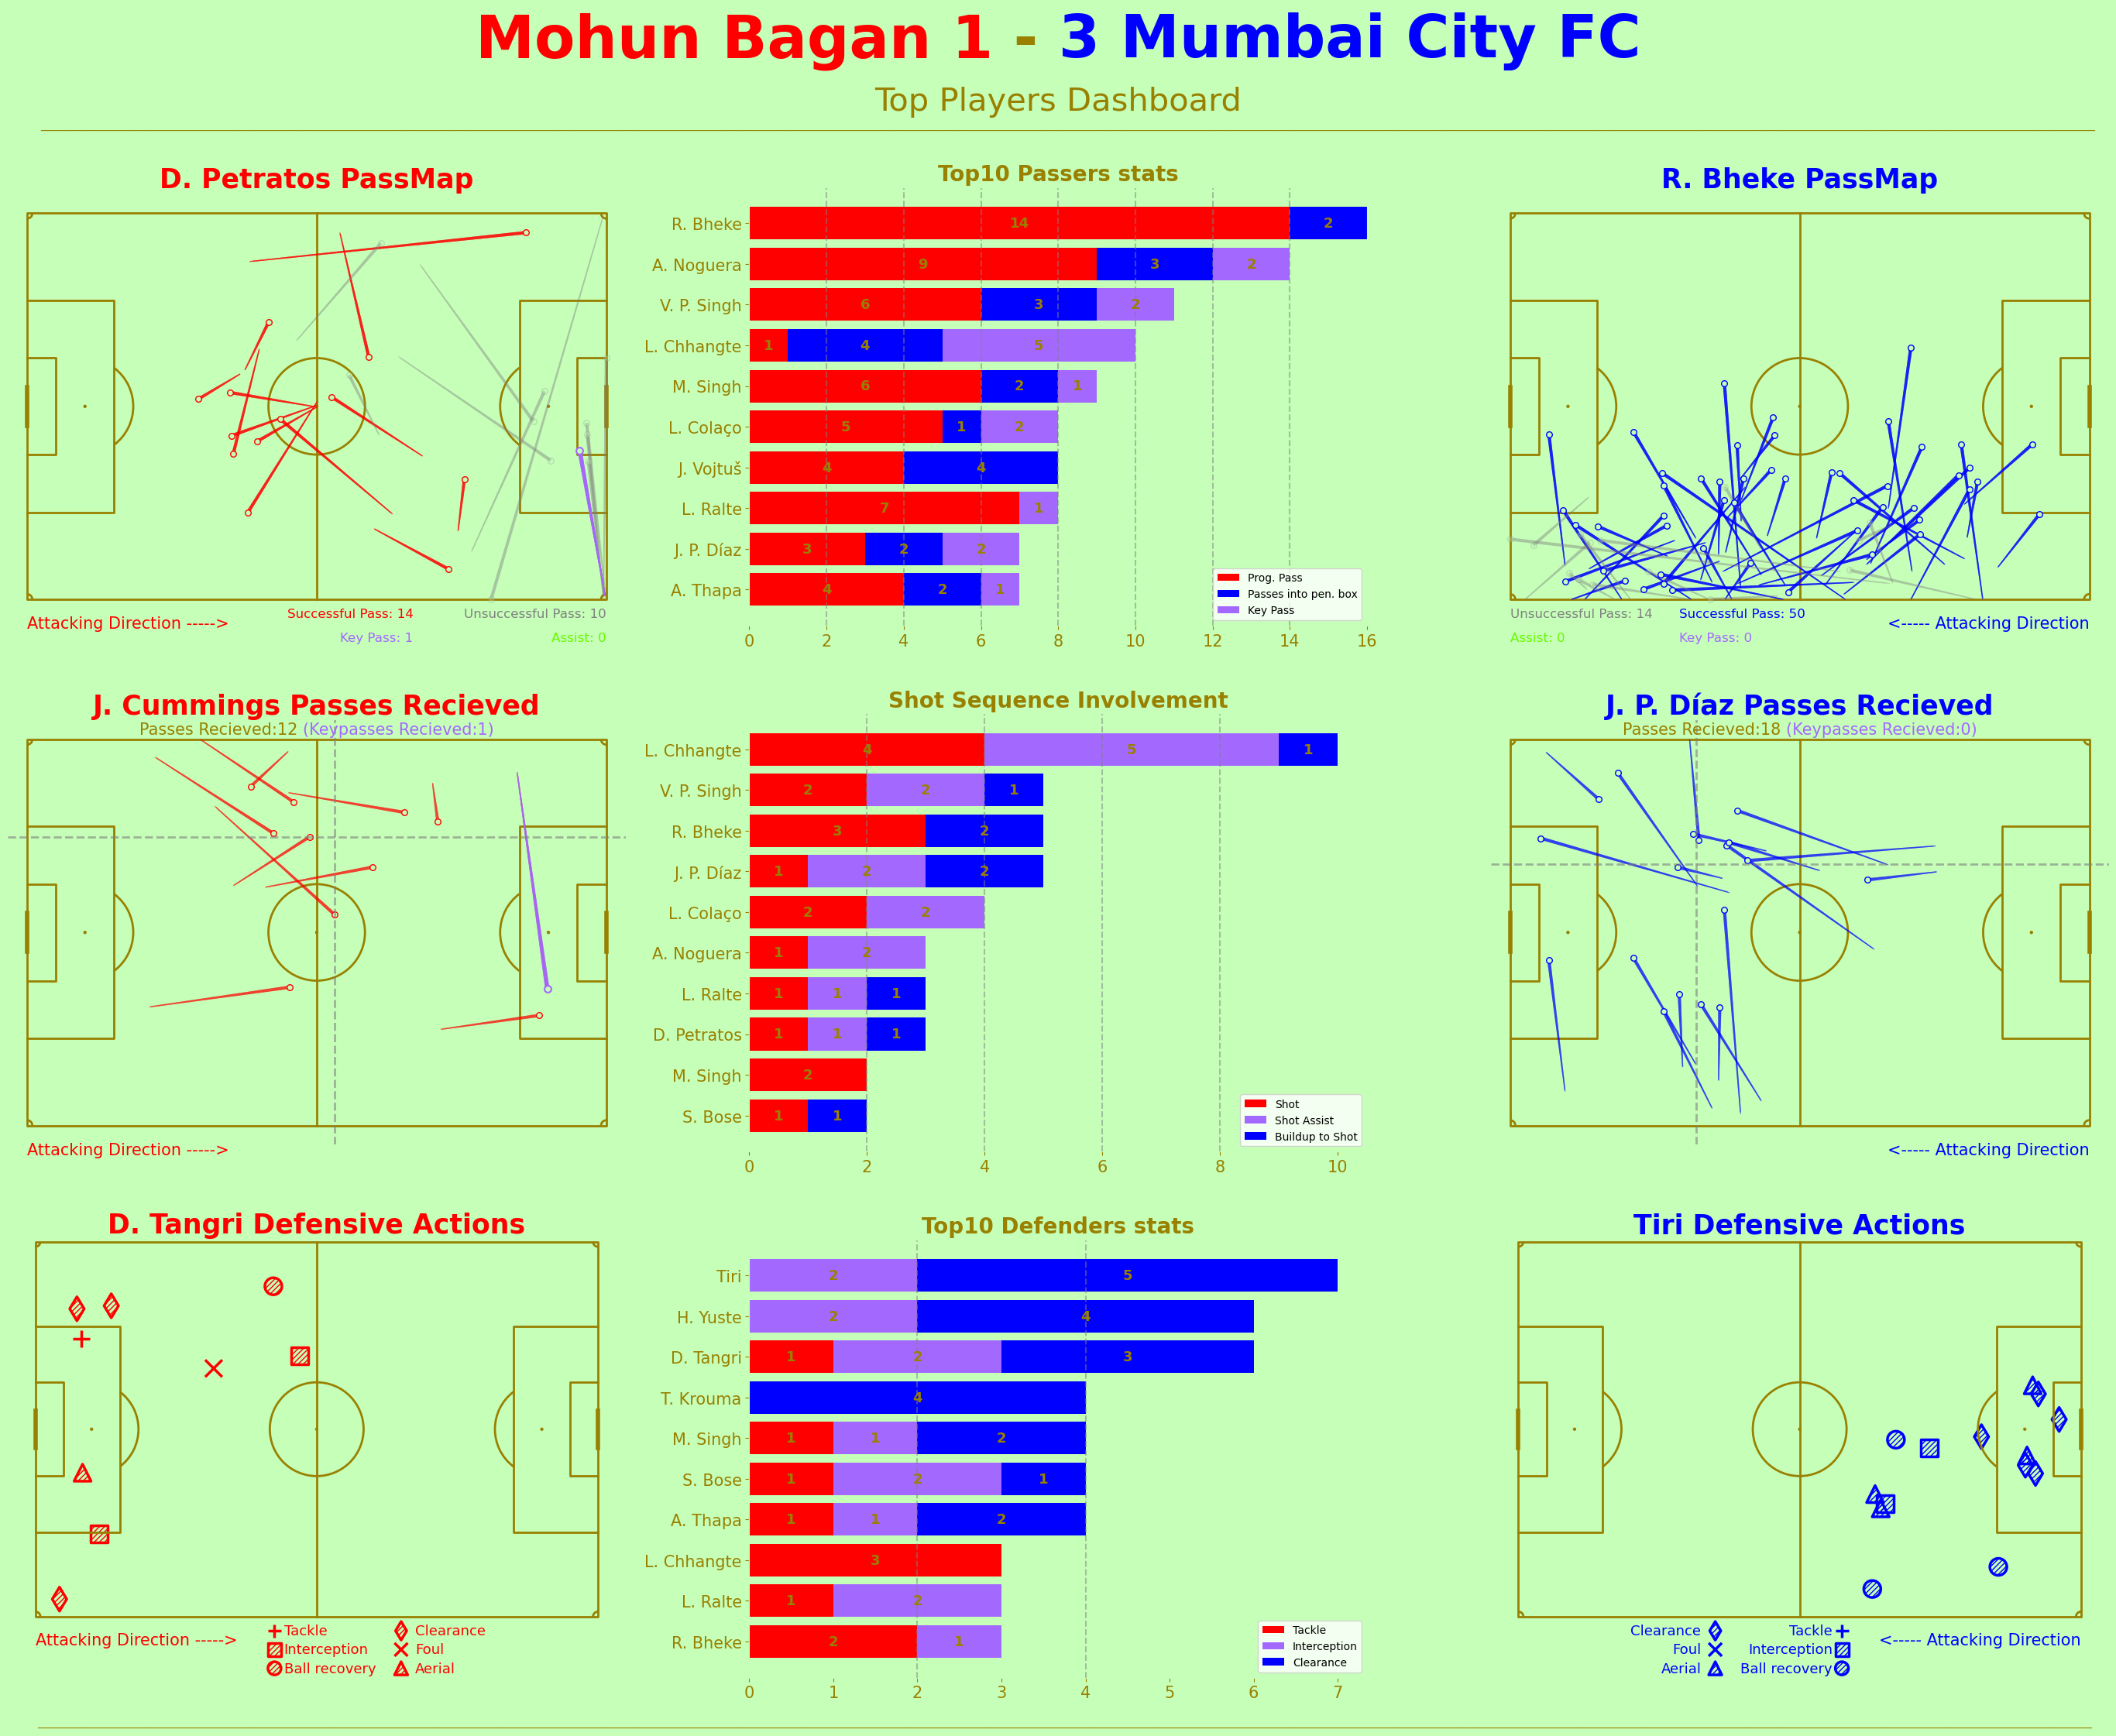

In [151]:
fig, axs = plt.subplots(3,3, figsize=(35,25), facecolor=bg_color)

home_player_passmap(axs[0,0])
passer_bar(axs[0,1])
away_player_passmap(axs[0,2])
home_passes_recieved(axs[1,0])
sh_sq_bar(axs[1,1])
away_passes_recieved(axs[1,2])
home_player_def_acts(axs[2,0])
defender_bar(axs[2,1])
away_player_def_acts(axs[2,2])